In [1]:
import pandas as pd
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from joblib import dump,load

DS=pd.read_excel('Dataset.xls')
display(DS)
DS['Survival']=1-DS['Mortality']

DS['Group']=DS['Group'].astype('category')

DS['Mortality']=DS['Mortality'].astype('category')
DS['Survival']=DS['Survival'].astype('category')
DS['Diagnosis']=DS['Diagnosis'].astype('category')
DS['Gender']=DS['Gender'].astype('category')

DS['Group2']=['Sepsis' if i==1 else 'Sirs' for i in DS['Group']]

DS.loc[(DS['Gender']=='E')|(DS['Gender']==' E ')|(DS['Gender']=='E '),'sex']='E'
DS.loc[(DS['Gender']=='K')|(DS['Gender']=='k'),'sex']='K'
DS['sex']=DS['sex'].astype('category')

DS=DS.dropna()
DS_SIRS=DS[DS['Group']==0]
DS_SEPSIS=DS[DS['Group']==1]

print(DS.columns)
display(DS.describe())
display(DS.describe(include = 'category'))

display(DS['Diagnosis'].unique())

display(DS['Group2'].value_counts())
display(DS_SIRS.shape)
display(DS_SEPSIS.shape)

StartDS=DS.copy()

,Age,Gender,Diagnosis,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,E,M,16.0,0.0,0.18,12.22,10.53,0.980,50.0,10.744898,164.0,9.7,0.0,7.0,0.0
2,46.0,E,M,7.0,0.0,0.15,14.92,11.91,2.120,10.0,5.617925,241.0,9.4,0.0,1.0,0.0
3,33.0,K,M,32.0,10.0,39.19,0.60,0.20,0.005,0.0,40.000000,14.0,8.9,1.0,54.0,1.0
4,76.0,E,M,25.0,4.0,17.81,14.82,13.49,2.800,20.0,4.817857,282.0,9.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,41.0,E,EC,7.0,2.0,0.60,3.35,2.88,0.300,10.0,9.600000,46.0,11.4,0.0,1.0,0.0
1254,63.0,E,M,14.0,6.0,5.80,9.80,8.32,0.760,10.0,10.947368,132.0,11.3,1.0,3.0,0.0
1255,60.0,E,M,24.0,8.0,1.20,5.06,4.38,0.490,10.0,8.938776,256.0,8.0,0.0,3.0,1.0
1256,79.0,E,EC,15.0,4.0,3.30,21.23,19.54,0.420,10.0,46.523810,145.0,10.6,0.0,1.0,0.0


Index(['Age', 'Gender', 'Diagnosis', 'APACHE II', 'SOFA', 'CRP', 'WBCC',
       'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV', 'Group', 'LOS-ICU',
       'Mortality', 'Survival', 'Group2', 'sex'],
      dtype='object')


,Age,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,LOS-ICU
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,56.547049,13.348485,2.583732,6.193078,11.766270,9.901519,1.033502,27.296651,13.130280,194.267145,10.129482,4.441786
std,19.236436,8.212691,3.255875,8.248558,5.968085,5.343191,0.756121,42.316555,15.304708,107.672049,3.726679,8.535418
min,18.000000,0.000000,0.000000,0.000000,0.600000,0.200000,0.005000,0.000000,0.481413,11.000000,0.000000,1.000000
25%,41.000000,7.000000,0.000000,0.700000,7.725000,6.190000,0.550000,0.000000,6.884316,120.000000,9.400000,1.000000
50%,58.000000,11.000000,1.000000,3.000000,10.785000,9.015000,0.860000,10.000000,10.494944,184.000000,10.100000,1.000000
75%,71.000000,18.000000,4.000000,8.007500,14.887500,12.727500,1.270000,40.000000,15.554310,247.000000,10.800000,4.000000
max,99.000000,48.000000,16.000000,52.050000,51.080000,50.500000,6.970000,410.000000,420.833333,854.000000,107.000000,96.000000


,Gender,Diagnosis,Group,Mortality,Survival,sex
count,1254,1254,1254.0,1254.0,1254.0,1254
unique,5,3,2.0,2.0,2.0,2
top,E,EC,0.0,0.0,1.0,E
freq,741,615,814.0,1125.0,1125.0,743


['M', 'EC', 'AC']
Categories (3, object): ['AC', 'EC', 'M']

Sirs      814
Sepsis    440
Name: Group2, dtype: int64

(814, 19)

(440, 19)

In [2]:
# Columns:
# Age: Subject's age
# APACHE II: Acute Physiologic Assessment and Chronic Health Evaluation - to diagnose patients' illness severity. the higher the worse
# CRP[mg/dL]: C-Reactive Protein which is produced in liver is an acute phase reactant and it is known that CRP is comprised of five subunits and deposited at sites of inflammation
# Diagnosis: medical, elective and emergency surgery ('AC', 'EC', 'M')
"""EC = elektif cerrahi = elective surgery;
AC = acil cerrahi = emergency surgery;
M = medikal = medical """# SOFA: The SOFA Score can be used to determine level of organ dysfunction and mortality risk in ICU patients.
# EOc[x1000/μL]: Eosinophils Count # should decrease
# Gender: Subject's gender (E (erkek):male, K (kadin):female)
# LymC[x1000/μL]: Lymphocytes Count # should decrease
# MPV[fL]: Mean Platelet Volume
# NEUc[x1000/μL]: Neutrophil Count # should increase
# NLCR: Neutrophil-lymphocyte Count Ratio # should increase
""" 5 main types:
Neutrophils – main action against bacterial and fungal infections.
Monocytes – main action against bacterial infections.
Eosinophils – main action against parasitic infections.
Basophils – responsible for responses to allergens.
Lymphocytes – main action against viral infections."""
# PLTc[x1000/μL]: Platelets Count
# WBCc[x1000/μL]: White Blood Cells Count # should increase




' 5 main types:\nNeutrophils – main action against bacterial and fungal infections.\nMonocytes – main action against bacterial infections.\nEosinophils – main action against parasitic infections.\nBasophils – responsible for responses to allergens.\nLymphocytes – main action against viral infections.'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.836e-01 stat=2.115e+00
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.381e-01 stat=4.469e+00
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=4.084e-10 stat=4.178e+01
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=5.912e-01


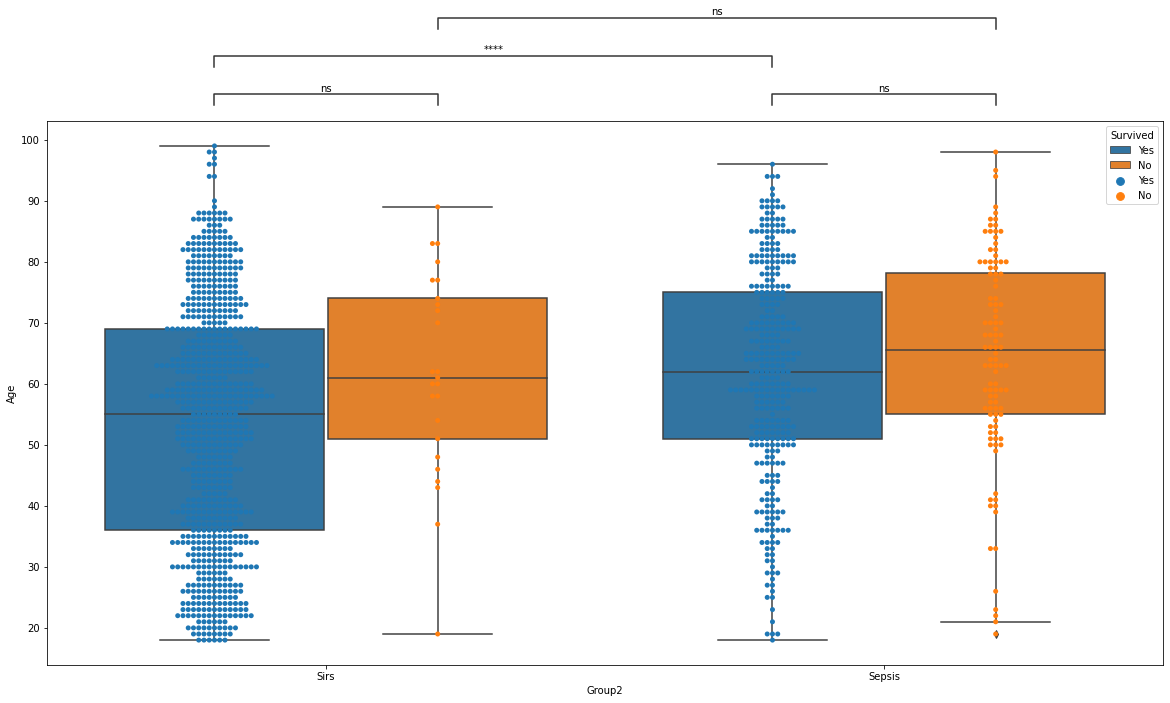

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.851e-25 stat=1.089e+02
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.766e-12 stat=5.245e+01
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.198e-53 stat=2.393e+02
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=6.489e-01


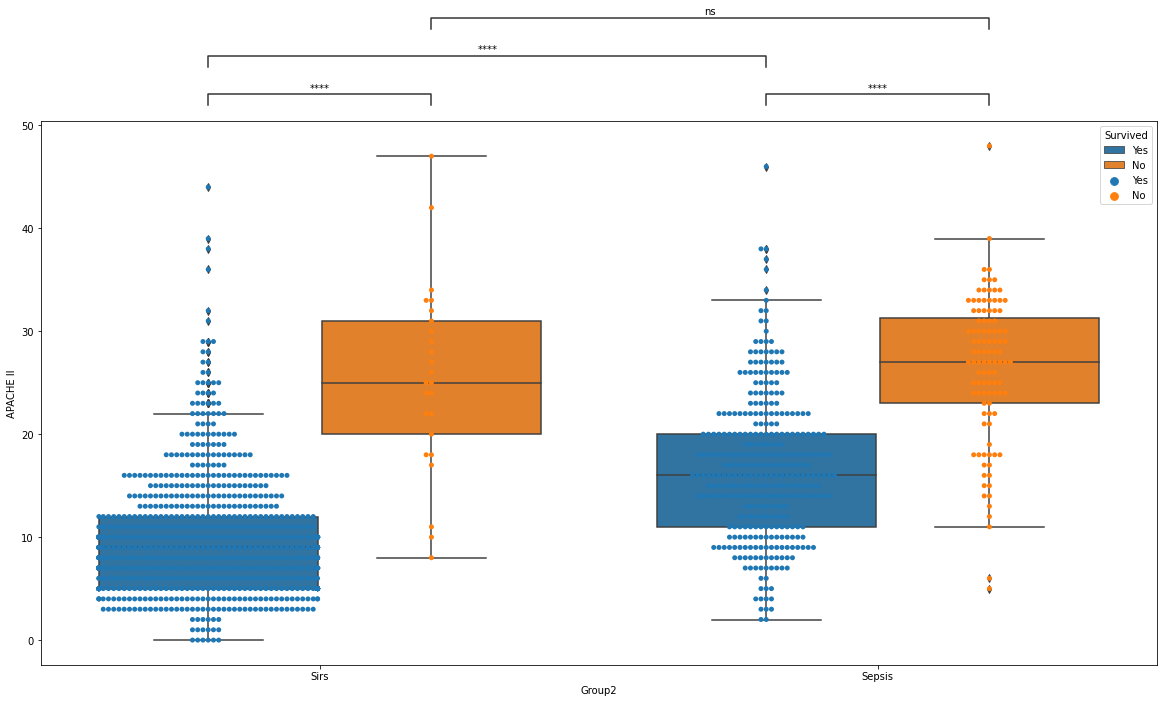

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.272e-27 stat=1.185e+02
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.553e-11 stat=4.818e+01
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.219e-21 stat=9.407e+01
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=8.069e-05


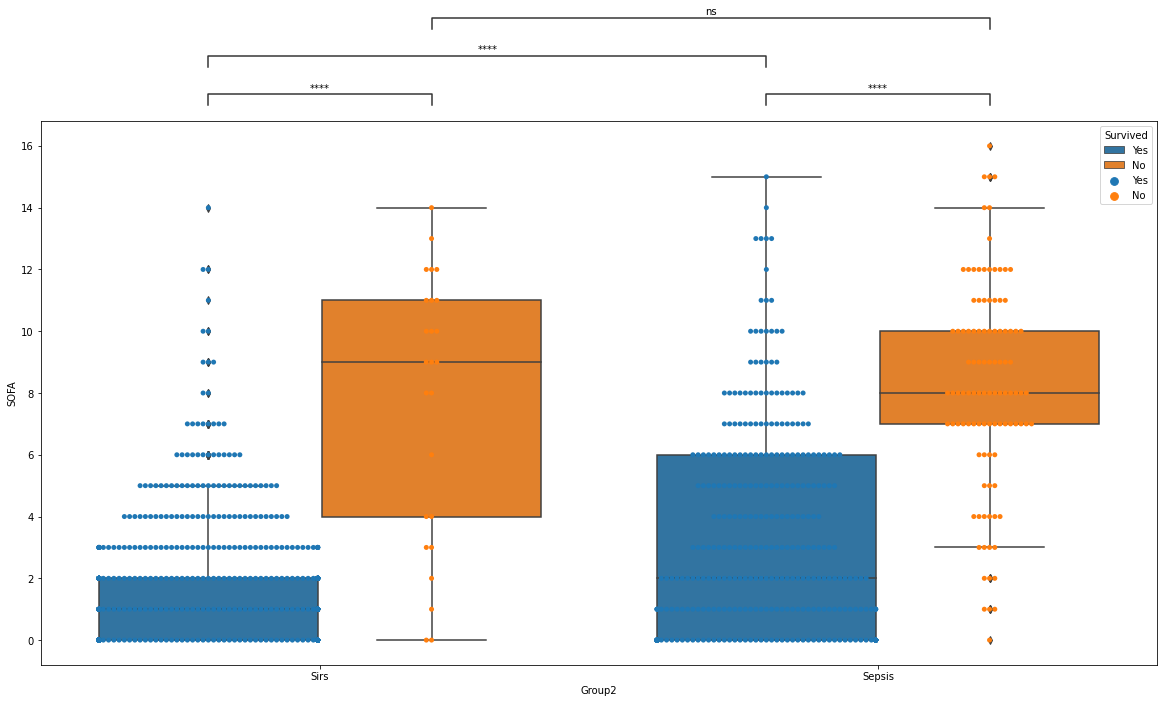

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.603e-01 stat=3.403e+00
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.710e-02
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.381e-17 stat=7.384e+01
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=8.426e-03 stat=9.454e+00


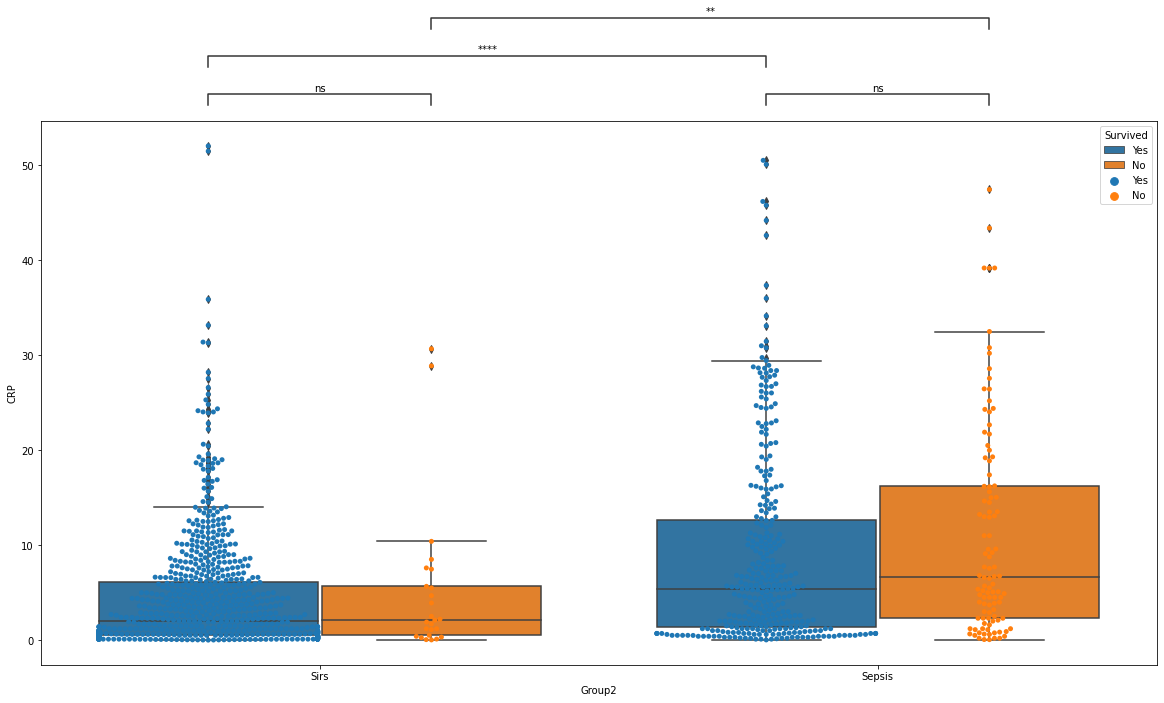

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.265e+00
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.819e-01 stat=1.879e+00
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.697e-03 stat=9.876e+00
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.529e-01 stat=1.944e+00


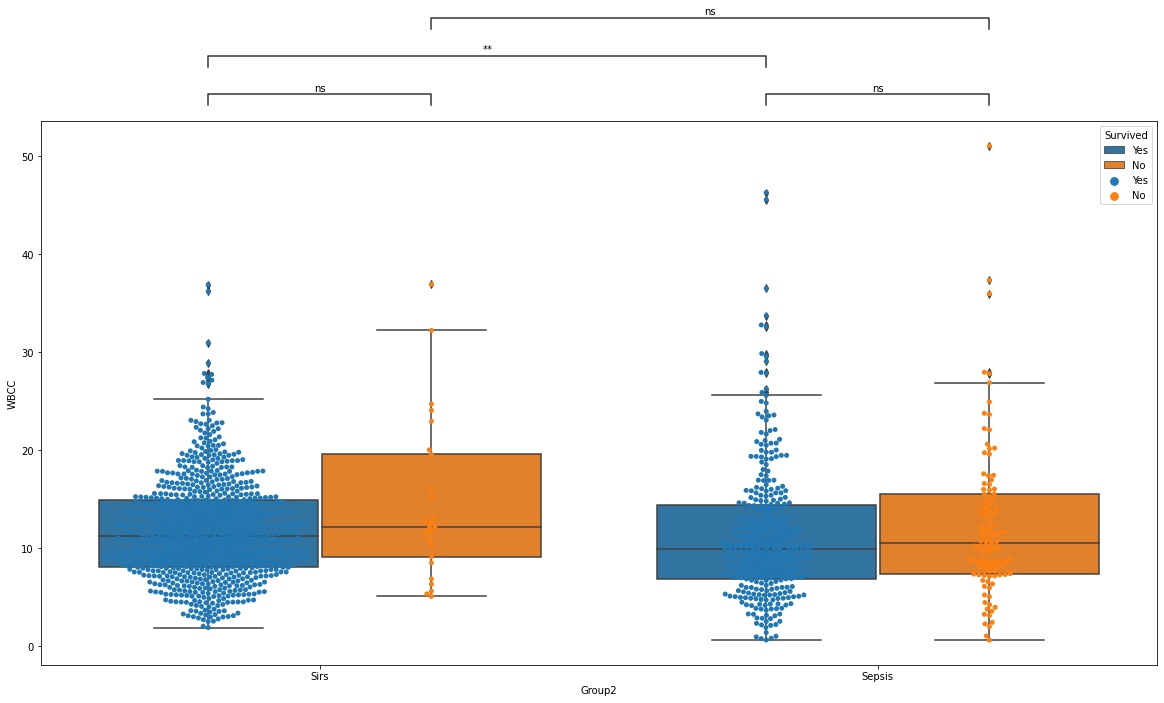

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.563e-01
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=9.881e-01
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.077e-02 stat=7.811e+00
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=9.859e-01 stat=1.343e+00


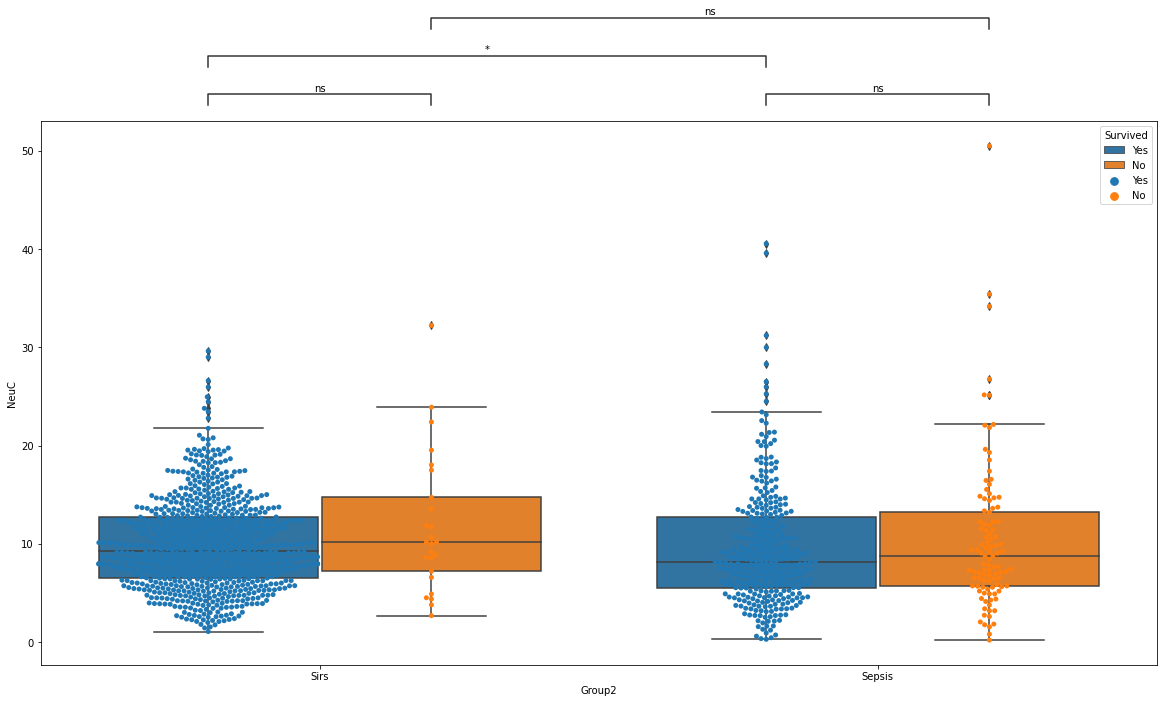

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.548e-02
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.021e-01 stat=4.988e+00
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.931e-09 stat=3.656e+01
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.142e-03 stat=1.128e+01


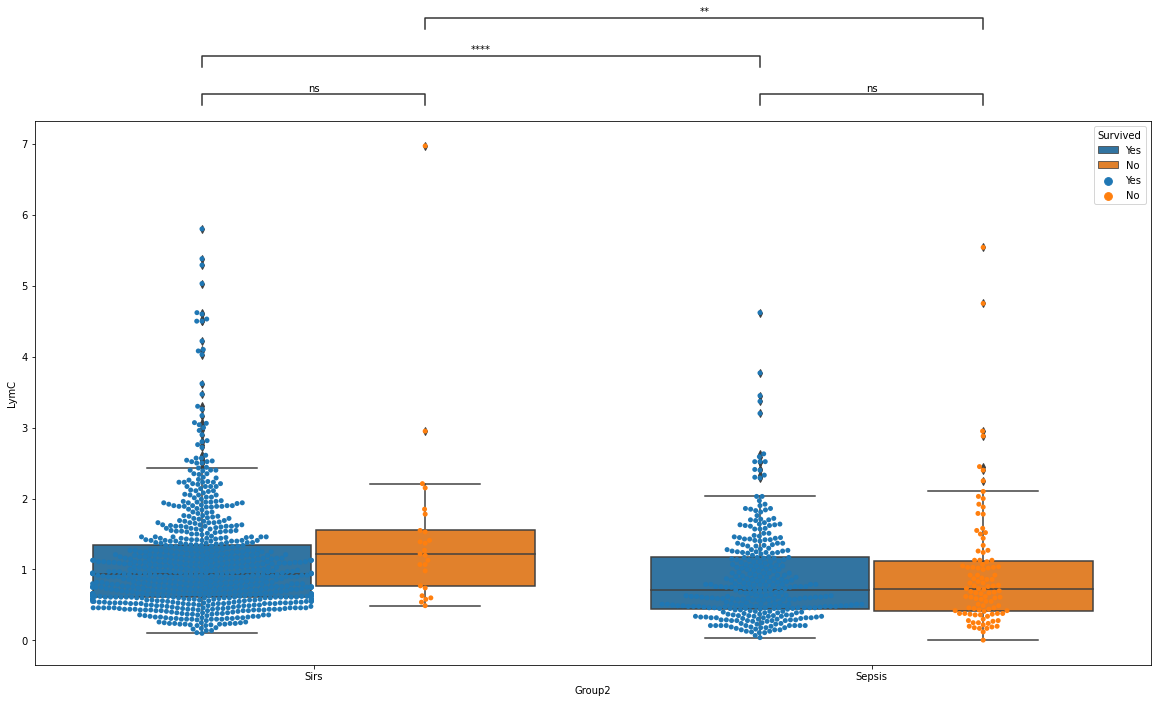

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.477e-01
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.124e-05 stat=1.998e+01
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.598e-01 stat=2.178e+00
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.150e-03 stat=1.198e+01


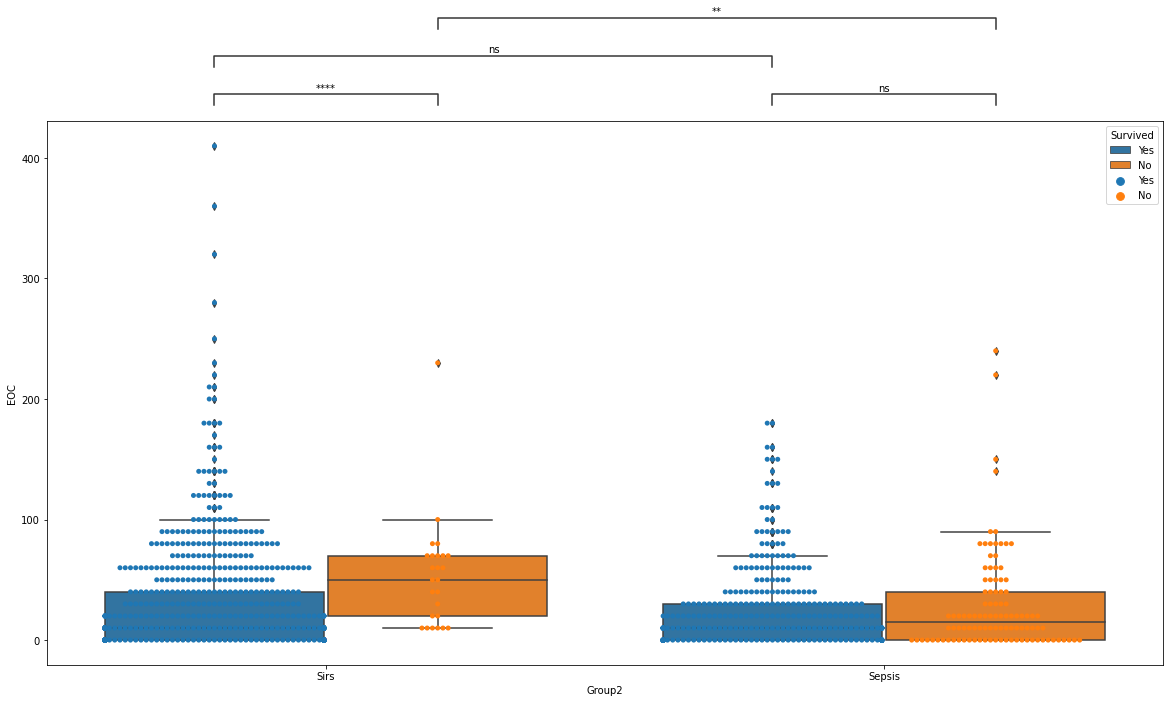

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=5.868e-02
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.171e-01
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.888e-03 stat=1.222e+01
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.905e-01 stat=2.744e+00


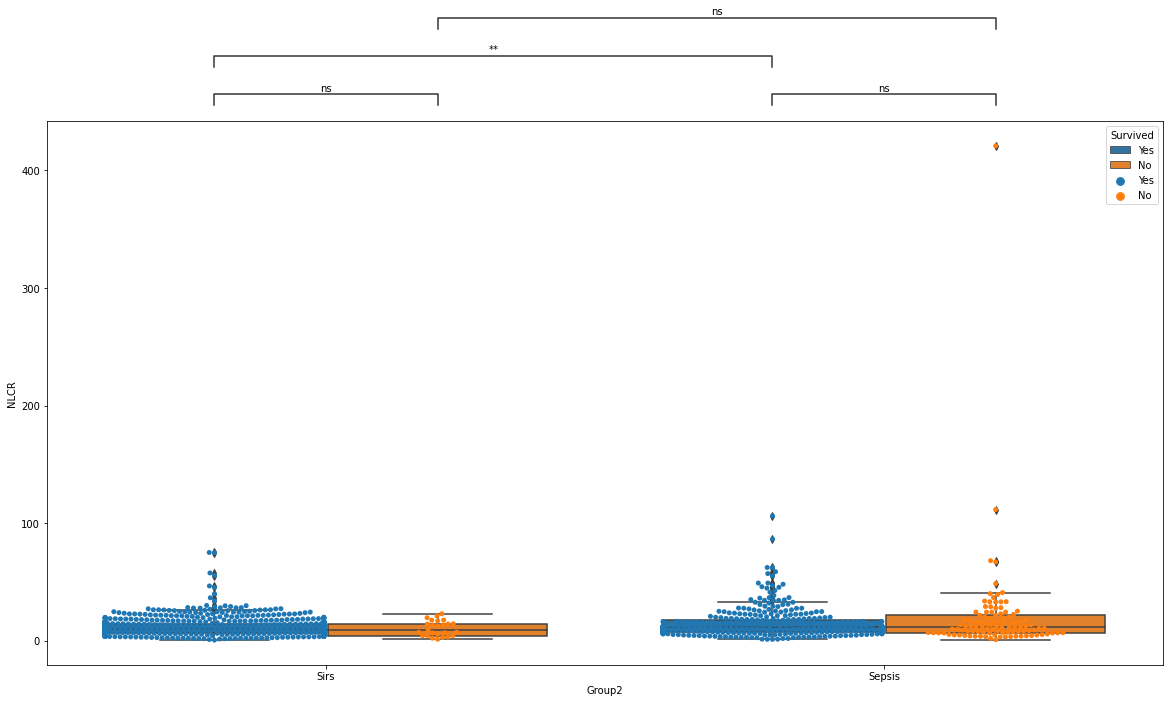

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.978e-01 stat=3.182e+00
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=5.489e-01
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.664e-01 stat=2.846e+00
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=6.000e-01


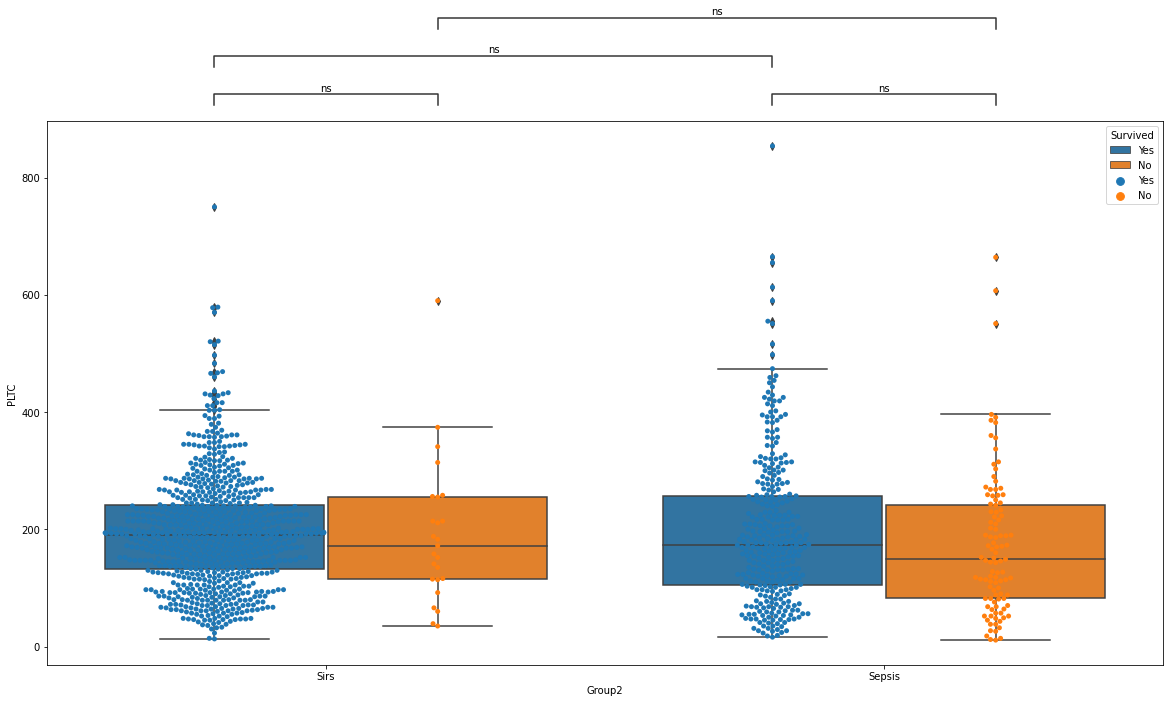

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sepsis_Yes v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.406e-01
Sirs_Yes v.s. Sirs_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.171e+00
Sirs_Yes v.s. Sepsis_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.660e-02
Sirs_No v.s. Sepsis_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.945e-01


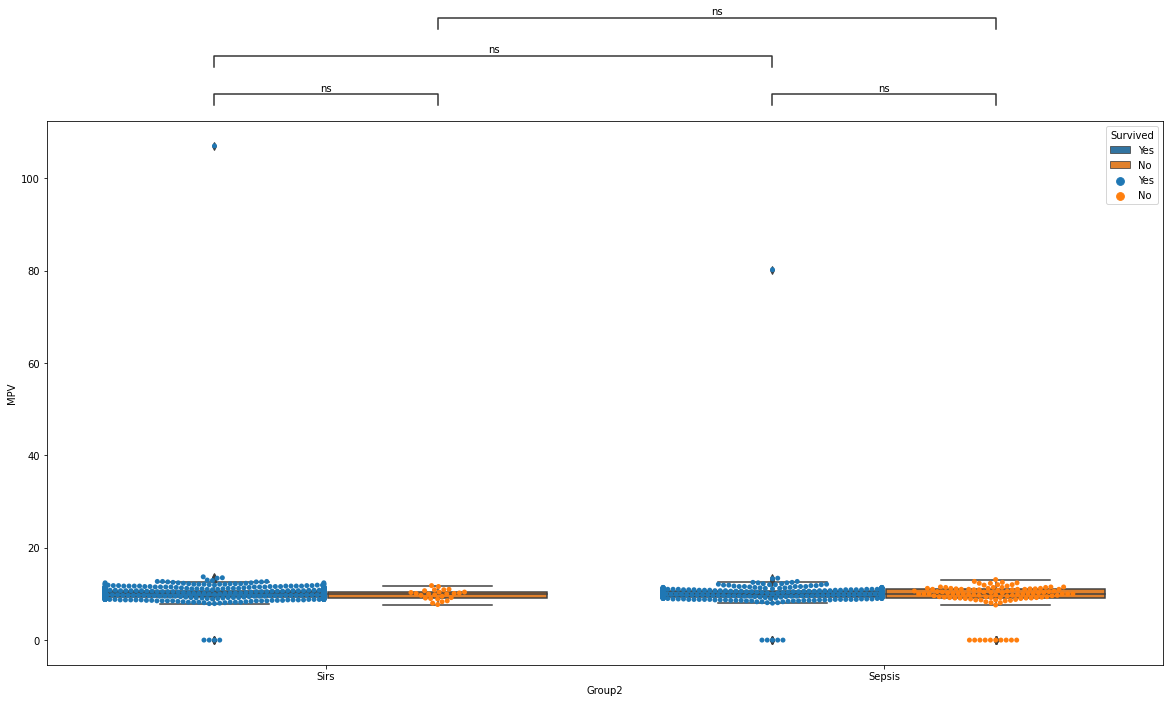

[['Age', 8.28968747388905e-06],
 ['APACHE II', 1.4673503404887225e-52],
 ['SOFA', 4.342426729034089e-52],
 ['CRP', 1.3193804530130705e-06],
 ['WBCC', 0.531029241330863],
 ['NeuC', 0.9209730419513482],
 ['LymC', 0.29173335638184195],
 ['EOC', 0.003445598398863392],
 ['NLCR', 0.2748635041851727],
 ['PLTC', 0.007526892096716789],
 ['MPV', 0.3062417968541469]]

[['Age', 9.184100651587271e-14],
 ['APACHE II', 2.5677773858346324e-74],
 ['SOFA', 5.46342624757603e-40],
 ['CRP', 2.251609492044827e-24],
 ['WBCC', 0.0024626373683546005],
 ['NeuC', 0.004548543322485885],
 ['LymC', 1.4002130837835195e-11],
 ['EOC', 0.1837306889928212],
 ['NLCR', 8.194453795999429e-05],
 ['PLTC', 0.009157999198426404],
 ['MPV', 0.7221846901953399]]

[['Age', 2.583060795016518e-13],
 ['APACHE II', 5.903242364484627e-96],
 ['SOFA', 3.817951750520316e-71],
 ['CRP', 5.077432007200809e-23],
 ['WBCC', 0.006219023331880395],
 ['NeuC', 0.024128036676151453],
 ['LymC', 7.209077255210094e-11],
 ['EOC', 3.8713613355955103e-05],
 ['NLCR', 0.0011767007842283794],
 ['PLTC', 0.014129906839204754],
 ['MPV', 0.6765619305447168]]

[['Age',
            1             2             3             4
  1  1.000000  2.179075e-01  1.000000e+00  1.000000e+00
  2  0.217907  1.000000e+00  3.272094e-07  7.480567e-10
  3  1.000000  3.272094e-07  1.000000e+00  1.000000e+00
  4  1.000000  7.480567e-10  1.000000e+00  1.000000e+00],
 ['APACHE II',
                1             2             3             4
  1  1.000000e+00  1.694627e-14  1.000000e+00  8.832012e-03
  2  1.694627e-14  1.000000e+00  1.077864e-60  6.248079e-47
  3  1.000000e+00  1.077864e-60  1.000000e+00  2.102328e-11
  4  8.832012e-03  6.248079e-47  2.102328e-11  1.000000e+00],
 ['SOFA',
                1             2             3             4
  1  1.000000e+00  3.518591e-12  1.000000e+00  1.768205e-04
  2  3.518591e-12  1.000000e+00  4.183685e-57  2.848006e-19
  3  1.000000e+00  4.183685e-57  1.000000e+00  5.466916e-21
  4  1.768205e-04  2.848006e-19  5.466916e-21  1.000000e+00],
 ['CRP',
            1             2             3             4
  1  1.000000  

Survived,No,Yes
Group2,,
Sepsis,58.736842,-58.736842
Sirs,-58.736842,58.736842


(128.66751992457574,
 8.018562521220687e-30,
 1,
 array([[ 45.26315789, 394.73684211],
        [ 83.73684211, 730.26315789]]))

sex,E,K
Group2,,
Sepsis,1.298246,-1.298246
Sirs,-1.298246,1.298246


(0.009240147335890042,
 0.9234207520029011,
 1,
 array([[260.70175439, 179.29824561],
        [482.29824561, 331.70175439]]))

sex,E,K
Survived,,
No,-6.433014,6.433014
Yes,6.433014,-6.433014


(1.259770577361584,
 0.2616945216273295,
 1,
 array([[ 76.43301435,  52.56698565],
        [666.56698565, 458.43301435]]))

In [3]:
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

"""'Age', 'Gender', 'Diagnosis', 'APACHE II', 'SOFA', 'CRP', 'WBCC',
'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV', 'Group', 'LOS-ICU',
'Mortality', 'Survival, sex'"""

cont_vars=['Age','APACHE II', 'SOFA', 'CRP', 'WBCC','NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
DS=StartDS.copy()

DS['Survived']=['Yes' if i==1 else 'No' for i in DS['Survival']]

pvals_mann_seps=[]
pvals_mann_surv=[]
pvals_krusk=[]
pvals_posthoc=[]

for i in cont_vars:
    
    # Ranksums Test
    g_no=DS.loc[DS['Survived']=='No',i]
    g_si=DS.loc[DS['Survived']=='Yes',i]    
    
    s,p_man=stats.ranksums(g_no,g_si)
    pvals_mann_surv.append([i,p_man])
    
    # Ranksums Test
    g_sirs=DS.loc[DS['Group']==0,i]
    g_sepsis=DS.loc[DS['Group']==1,i]    
    
    s,p_man=stats.ranksums(g_sirs,g_sepsis)
    pvals_mann_seps.append([i,p_man])
    
    # Kruskal Wallis Test
    g_sirs_no=DS.loc[(DS['Group2']=='Sirs')&(DS['Survived']=='No'),i]
    g_sirs_si=DS.loc[(DS['Group2']=='Sirs')&(DS['Survived']=='Yes'),i]
    g_sepsis_no=DS.loc[(DS['Group2']=='Sepsis')&(DS['Survived']=='No'),i]
    g_sepsis_si=DS.loc[(DS['Group2']=='Sepsis')&(DS['Survived']=='Yes'),i]    
    
    s,p_kru=stats.kruskal(g_sirs_no,g_sirs_si,g_sepsis_no,g_sepsis_si)
    pvals_krusk.append([i,p_kru])
    
    if p_kru<0.05:
        # Kruskal Wallis Test
        p2=posthoc_dunn([g_sirs_no,g_sirs_si,g_sepsis_no,g_sepsis_si],p_adjust='bonferroni')
        pvals_posthoc.append([i,p2])
        
        
        
    plt.figure(figsize=(20,10))
    ax=sns.swarmplot(x='Group2',y=i,hue='Survived',data=DS,size=5,dodge=True)
    sns.boxplot(x='Group2',y=i,hue='Survived',data=DS,ax=ax)

    add_stat_annotation(ax, data=DS, x='Group2',y=i,hue='Survived',
                        box_pairs=[(('Sepsis', 'Yes'),('Sepsis', 'No')),(('Sirs','Yes'),('Sirs','No')),
                                  (('Sepsis', 'Yes'),('Sirs', 'Yes')),(('Sepsis','No'),('Sirs','No'))],
                        test='Kruskal',comparisons_correction='bonferroni', text_format='star', loc='outside', verbose=2)
    plt.show()
    

display(pvals_mann_surv)
display(pvals_mann_seps)
display(pvals_krusk)
display(pvals_posthoc)

pvals_chi2=[]
ctab=pd.crosstab(DS['Group2'],DS['Survived'])
chi2,p3,dof,etab=stats.chi2_contingency(ctab)
rtab=ctab-etab
display(rtab)
display(stats.chi2_contingency(ctab))
pvals_chi2.append([chi2,p3,'Group2','Survived'])


ctab=pd.crosstab(DS['Group2'],DS['sex'])
chi2,p3,dof,etab=stats.chi2_contingency(ctab)
rtab=ctab-etab
display(rtab)
display(stats.chi2_contingency(ctab))
pvals_chi2.append([chi2,p3,'Group2','Sex'])

ctab=pd.crosstab(DS['Survived'],DS['sex'])
chi2,p3,dof,etab=stats.chi2_contingency(ctab)
rtab=ctab-etab
display(rtab)
display(stats.chi2_contingency(ctab))
pvals_chi2.append([chi2,p3,'Survived','Sex'])


In [4]:
dump(pvals_mann_surv,'ReRun_ALL/pvals_mann_surv')
dump(pvals_mann_seps,'ReRun_ALL/pvals_mann_seps')
dump(pvals_krusk,'ReRun_ALL/pvals_krusk')
dump(pvals_posthoc,'ReRun_ALL/pvals_posthoc')
dump(pvals_chi2,'ReRun_ALL/pvals_chi2')

['ReRun_ALL/pvals_chi2']

In [5]:
pd.DataFrame(pvals_chi2)

,0,1,2,3
0,128.667520,8.018563e-30,Group2,Survived
1,0.009240,9.234208e-01,Group2,Sex
2,1.259771,2.616945e-01,Survived,Sex


In [6]:
# SIRS
DS_SIRS.loc[(DS_SIRS['Gender']=='E')|(DS_SIRS['Gender']==' E ')|(DS_SIRS['Gender']=='E '),'sex']='E'
DS_SIRS.loc[(DS_SIRS['Gender']=='K')|(DS_SIRS['Gender']=='k'),'sex']='K'

# Not Surv
round(DS_SIRS[DS_SIRS['Survival']==0].describe(),2).T[['50%','mean','25%','75%','std']].to_csv('ReRun_ALL/SIRS_SURV0_NUM.csv',sep='&')
#round(DS_SIRS[DS_SIRS['Survival']==0].describe(include = 'category'),2).T.to_csv('ReRun_ALL/SIRS_SURV0_CAT.csv',sep='&')
round(DS_SIRS.loc[DS_SIRS['Survival']==0,['Age','Diagnosis']].groupby('Diagnosis').count(),2).to_csv('ReRun_ALL/SIRS_SURV0_CAT2.csv',sep='&')
round(DS_SIRS.loc[DS_SIRS['Survival']==0,['Age','sex']].groupby('sex').count(),2).to_csv('ReRun_ALL/SIRS_SURV0_CAT3.csv',sep='&')

# Surv
round(DS_SIRS[DS_SIRS['Survival']==1].describe(),2).T[['50%','mean','25%','75%','std']].to_csv('ReRun_ALL/SIRS_SURV1_NUM.csv',sep='&')
#round(DS_SIRS[DS_SIRS['Survival']==1].describe(include = 'category'),2).T.to_csv('ReRun_ALL/SIRS_SURV1_CAT.csv',sep='&')
round(DS_SIRS.loc[DS_SIRS['Survival']==1,['Age','Diagnosis']].groupby('Diagnosis').count(),2).to_csv('ReRun_ALL/SIRS_SURV1_CAT2.csv',sep='&')
round(DS_SIRS.loc[DS_SIRS['Survival']==1,['Age','sex']].groupby('sex').count(),2).to_csv('ReRun_ALL/SIRS_SURV1_CAT3.csv',sep='&')

# All
round(DS_SIRS[['Age','Diagnosis']].groupby('Diagnosis').count(),2).to_csv('ReRun_ALL/SIRS_ALL_CAT2.csv',sep='&')
round(DS_SIRS[['Age','sex']].groupby('sex').count(),2).to_csv('ReRun_ALL/SIRS_ALL_CAT3.csv',sep='&')
round(DS_SIRS.describe(),2).T[['50%','mean','25%','75%','std']].to_csv('ReRun_ALL/SIRS_ALL_NUM.csv',sep='&')


In [7]:
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

"""'Age', 'Gender', 'Diagnosis', 'APACHE II', 'SOFA', 'CRP', 'WBCC',
'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV', 'Group', 'LOS-ICU',
'Mortality', 'Survival, sex'"""

cont_vars=['Age','APACHE II', 'SOFA', 'CRP', 'WBCC','NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
DS=DS_SIRS.copy()

DS['Survived']=['Yes' if i==1 else 'No' for i in DS['Survival']]

pvals_mann_surv_sirs=[]

for i in cont_vars:
    
    # Ranksums Test
    g_no=DS.loc[DS['Survived']=='No',i]
    g_si=DS.loc[DS['Survived']=='Yes',i]    
    
    s,p_man=stats.ranksums(g_no,g_si)
    pvals_mann_surv_sirs.append([i,p_man,p_man<0.005])
    
pvals_chi2_sirs=[]

ctab=pd.crosstab(DS['Survived'],DS['sex'])
chi2,p3,dof,etab=stats.chi2_contingency(ctab)
rtab=ctab-etab
display(rtab)
display(stats.chi2_contingency(ctab))
pvals_chi2_sirs.append([chi2,p3,'Survived','Sex'])



display(pvals_mann_surv_sirs)
display(pvals_chi2_sirs)

Results_stat_uni_SIRS=pd.DataFrame(pvals_mann_surv_sirs,columns=['Variable','pval','<0.005'])
Results_stat_uni_SIRS['pval']=np.round(Results_stat_uni_SIRS['pval'],4)
Results_stat_uni_SIRS.to_latex('ReRun_ALL\Biostat_Univariate_SIRS.tex')

sex,E,K
Survived,,
No,2.227273,-2.227273
Yes,-2.227273,2.227273


(0.5093176475685981,
 0.47543439049882996,
 1,
 array([[ 14.77272727,  10.22727273],
        [466.22727273, 322.77272727]]))

[['Age', 0.03453874167514475, False],
 ['APACHE II', 5.025992786895395e-13, True],
 ['SOFA', 5.4521595869019007e-11, True],
 ['CRP', 0.8692682397788403, False],
 ['WBCC', 0.17046753380784563, False],
 ['NeuC', 0.32021891029895777, False],
 ['LymC', 0.02552347664943259, False],
 ['EOC', 1.5981083306238178e-05, True],
 ['NLCR', 0.5183930258052757, False],
 ['PLTC', 0.4587769921256418, False],
 ['MPV', 0.27957701364628385, False]]

[[0.5093176475685981, 0.47543439049882996, 'Survived', 'Sex']]

In [8]:
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

"""'Age', 'Gender', 'Diagnosis', 'APACHE II', 'SOFA', 'CRP', 'WBCC',
'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV', 'Group', 'LOS-ICU',
'Mortality', 'Survival, sex'"""

cont_vars=['Age','APACHE II', 'SOFA', 'CRP', 'WBCC','NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
DS=DS_SEPSIS.copy()

DS['Survived']=['Yes' if i==1 else 'No' for i in DS['Survival']]

pvals_mann_seps_sepsis=[]
pvals_mann_surv_sepsis=[]

for i in cont_vars:
    
    # Ranksums Test
    g_no=DS.loc[DS['Survived']=='No',i]
    g_si=DS.loc[DS['Survived']=='Yes',i]    
    
    s,p_man=stats.ranksums(g_no,g_si)
    pvals_mann_surv_sepsis.append([i,p_man,p_man<0.005])

pvals_chi2_sepsis=[]

ctab=pd.crosstab(DS['Survived'],DS['sex'])
chi2,p3,dof,etab=stats.chi2_contingency(ctab)
rtab=ctab-etab
display(rtab)
display(stats.chi2_contingency(ctab))
pvals_chi2_sepsis.append([chi2,p3,'Survived','Sex'])



display(pvals_mann_surv_sepsis)
display(pvals_chi2_sepsis)

Results_stat_uni_SEPSIS=pd.DataFrame(pvals_mann_surv_sepsis,columns=['Variable','pval','<0.005'])
Results_stat_uni_SEPSIS['pval']=np.round(Results_stat_uni_SEPSIS['pval'],4)

Results_stat_uni_SEPSIS.to_latex('ReRun_ALL\Biostat_Univariate_SEPSIS.tex')

sex,E,K
Survived,,
No,-8.927273,8.927273
Yes,8.927273,-8.927273


(3.7122585579786063,
 0.05401425574090733,
 1,
 array([[ 61.92727273,  42.07272727],
        [200.07272727, 135.92727273]]))

[['Age', 0.1459963988829406, False],
 ['APACHE II', 1.9037440205057925e-25, True],
 ['SOFA', 2.8753660150301885e-27, True],
 ['CRP', 0.06507535247057569, False],
 ['WBCC', 0.26072917431736153, False],
 ['NeuC', 0.49935334874097204, False],
 ['LymC', 0.9009795777323509, False],
 ['EOC', 0.5650541660205348, False],
 ['NLCR', 0.8086021926703254, False],
 ['PLTC', 0.07444775338420048, False],
 ['MPV', 0.6239957540076033, False]]

[[3.7122585579786063, 0.05401425574090733, 'Survived', 'Sex']]

In [9]:
'''from rpy2.robjects.packages import importr
import rpy2
import rpy2.situation

#os.environ['R_HOME']='C:\\Program Files\\R\\R-4.1.2\\bin\\x64'
#display(os.environ)

utils = importr('utils')
utils.install_packages('stats')
#stats = importr('stats')


"""
display(rpy2.__path__)
utils=importr('utils')
import os

for row in rpy2.situation.iter_info():
    print(row)
    


"""
'''

'from rpy2.robjects.packages import importr\nimport rpy2\nimport rpy2.situation\n\n#os.environ[\'R_HOME\']=\'C:\\Program Files\\R\\R-4.1.2\\bin\\x64\'\n#display(os.environ)\n\nutils = importr(\'utils\')\nutils.install_packages(\'stats\')\n#stats = importr(\'stats\')\n\n\n"""\ndisplay(rpy2.__path__)\nutils=importr(\'utils\')\nimport os\n\nfor row in rpy2.situation.iter_info():\n    print(row)\n    \n\n\n"""\n'

In [10]:
"""matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 15
#matplotlib.rcParams['ylabel.fontsize'] = 15
#matplotlib.rcParams['xlabel.fontsize'] = 15
matplotlib.rcParams['font.size'] = 20

matplotlib.rcParams.keys()"""

"matplotlib.rcParams['lines.linewidth'] = 2\nmatplotlib.rcParams['ytick.labelsize'] = 15\nmatplotlib.rcParams['xtick.labelsize'] = 15\n#matplotlib.rcParams['ylabel.fontsize'] = 15\n#matplotlib.rcParams['xlabel.fontsize'] = 15\nmatplotlib.rcParams['font.size'] = 20\n\nmatplotlib.rcParams.keys()"

In [11]:
"""import scipy.stats as stats

"""'Age', 'Gender', 'Diagnosis', 'APACHE II', 'SOFA', 'CRP', 'WBCC',
'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV', 'Group', 'LOS-ICU',
'Mortality', 'Survival, sex'"""

cont_vars=['Age','APACHE II', 'SOFA', 'CRP', 'WBCC','NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
DS=DS_SIRS.copy()
DS['Survived']=['Yes' if i==1 else 'No' for i in DS['Survival']]

for i in cont_vars:

    plt.figure(figsize=(12,8))
    ax=sns.swarmplot(x='Survived',y=i,data=DS,size=5,dodge=True)
    sns.boxplot(y=i,x='Survived',data=DS,ax=ax)

    add_stat_annotation(ax, data=DS, y=i,x='Survived',
                        box_pairs=[('Yes','No')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
    plt.show()

ctab=pd.crosstab(DS['sex'],DS['Survival'])
chi,p,dof,etab=stats.chi2_contingency(ctab)
rtab=ctab-etab
display(rtab)
display(stats.chi2_contingency(ctab))

for i in cont_vars:

    plt.figure(figsize=(20,10))
    ax=sns.swarmplot(x='sex',y=i,hue='Survived',data=DS,size=5,dodge=True)
    sns.boxplot(x='sex',y=i,hue='Survived',data=DS,ax=ax)

    add_stat_annotation(ax, data=DS, x='sex',y=i,hue='Survived',
                        box_pairs=[(('E', 'Yes'),('E', 'No')),(('K','Yes'),('K','No')),
                                  (('E', 'Yes'),('K', 'Yes')),(('E','No'),('K','No'))],
                        test='Kruskal',comparisons_correction='bonferroni', text_format='star', loc='outside', verbose=2)
    plt.show()

"""

('Mortality',
 "Survival, sex\n\ncont_vars=['Age','APACHE II', 'SOFA', 'CRP', 'WBCC','NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']\nDS=DS_SIRS.copy()\nDS['Survived']=['Yes' if i==1 else 'No' for i in DS['Survival']]\n\nfor i in cont_vars:\n\n    plt.figure(figsize=(12,8))\n    ax=sns.swarmplot(x='Survived',y=i,data=DS,size=5,dodge=True)\n    sns.boxplot(y=i,x='Survived',data=DS,ax=ax)\n\n    add_stat_annotation(ax, data=DS, y=i,x='Survived',\n                        box_pairs=[('Yes','No')],\n                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)\n    plt.show()\n\nctab=pd.crosstab(DS['sex'],DS['Survival'])\nchi,p,dof,etab=stats.chi2_contingency(ctab)\nrtab=ctab-etab\ndisplay(rtab)\ndisplay(stats.chi2_contingency(ctab))\n\nfor i in cont_vars:\n\n    plt.figure(figsize=(20,10))\n    ax=sns.swarmplot(x='sex',y=i,hue='Survived',data=DS,size=5,dodge=True)\n    sns.boxplot(x='sex',y=i,hue='Survived',data=DS,ax=ax)\n\n    add_stat_annotation(ax, data=DS, x

In [12]:
# SEPSIS
DS_SEPSIS.loc[(DS_SEPSIS['Gender']=='E')|(DS_SEPSIS['Gender']==' E ')|(DS_SEPSIS['Gender']=='E '),'sex']='E'
DS_SEPSIS.loc[(DS_SEPSIS['Gender']=='K')|(DS_SEPSIS['Gender']=='K ')|(DS_SEPSIS['Gender']=='k'),'sex']='K'

# Not Surv
round(DS_SEPSIS[DS_SEPSIS['Survival']==0].describe(),2).T[['50%','mean','25%','75%','std']].to_csv('ReRun_ALL/SEPSIS_SURV0_NUM.csv',sep='&')
#round(DS_SEPSIS[DS_SEPSIS['Survival']==0].describe(include = 'category'),2).T.to_csv('ReRun_ALL/SEPSIS_SURV0_CAT.csv',sep='&')
round(DS_SEPSIS.loc[DS_SEPSIS['Survival']==0,['Age','Diagnosis']].groupby('Diagnosis').count(),2).to_csv('ReRun_ALL/SEPSIS_SURV0_CAT2.csv',sep='&')
round(DS_SEPSIS.loc[DS_SEPSIS['Survival']==0,['Age','sex']].groupby('sex').count(),2).to_csv('ReRun_ALL/SEPSIS_SURV0_CAT3.csv',sep='&')

# Surv
round(DS_SEPSIS[DS_SEPSIS['Survival']==1].describe(),2).T[['50%','mean','25%','75%','std']].to_csv('ReRun_ALL/SEPSIS_SURV1_NUM.csv',sep='&')
#round(DS_SEPSIS.loc[DS_SEPSIS['Survival']==1,'AGE'].describe(include = 'category'),2).T.to_csv('ReRun_ALL/SEPSIS_SURV1_CAT.csv',sep='&')
round(DS_SEPSIS.loc[DS_SEPSIS['Survival']==1,['Age','Diagnosis']].groupby('Diagnosis').count(),2).to_csv('ReRun_ALL/SEPSIS_SURV1_CAT2.csv',sep='&')
round(DS_SEPSIS.loc[DS_SEPSIS['Survival']==1,['Age','sex']].groupby('sex').count(),2).to_csv('ReRun_ALL/SEPSIS_SURV1_CAT3.csv',sep='&')

# ALL
round(DS_SEPSIS[['Age','Diagnosis']].groupby('Diagnosis').count(),2).to_csv('ReRun_ALL/SEPSIS_ALL_CAT2.csv',sep='&')
round(DS_SEPSIS[['Age','sex']].groupby('sex').count(),2).to_csv('ReRun_ALL/SEPSIS_ALL_CAT3.csv',sep='&')
round(DS_SEPSIS.describe(),2).T[['50%','mean','25%','75%','std']].to_csv('ReRun_ALL/SEPSIS_ALL_NUM.csv',sep='&')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.460e-01 U_stat=1.912e+04


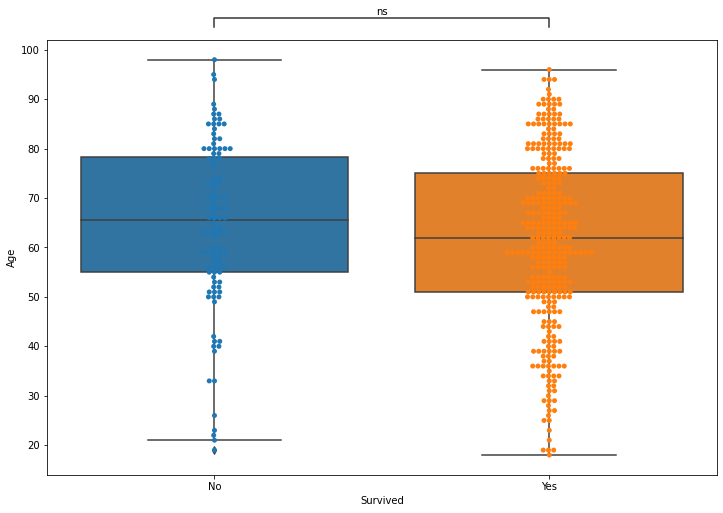

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.721e-25 U_stat=2.929e+04


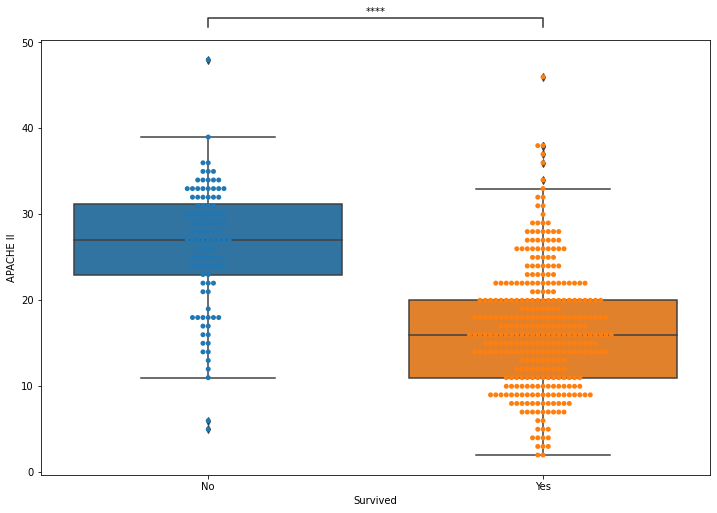

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.325e-27 U_stat=2.973e+04


C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


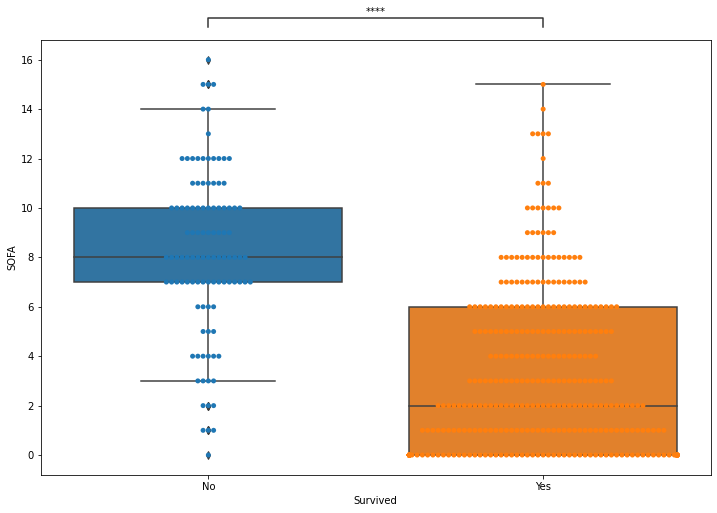

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.513e-02 U_stat=1.956e+04


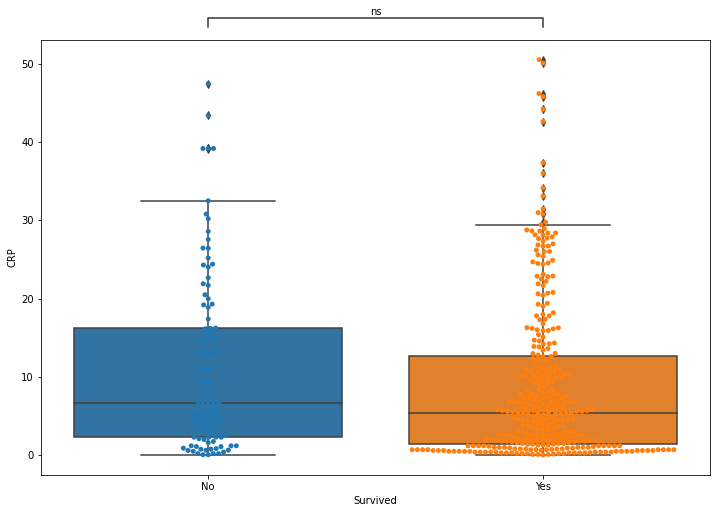

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.609e-01 U_stat=1.875e+04


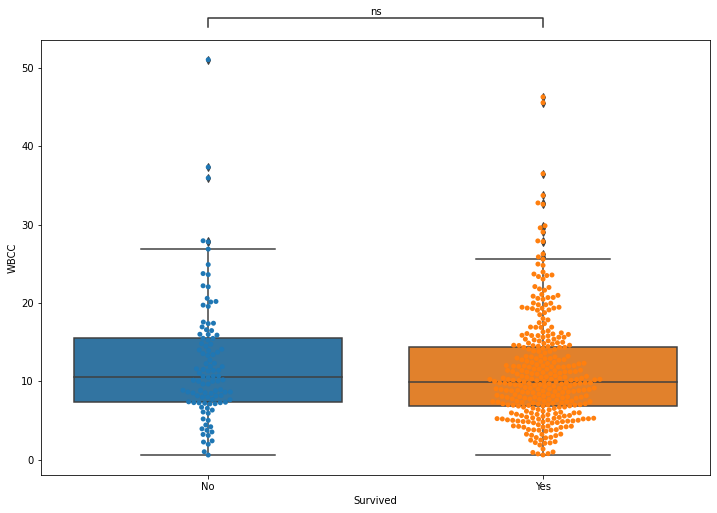

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.996e-01 U_stat=1.824e+04


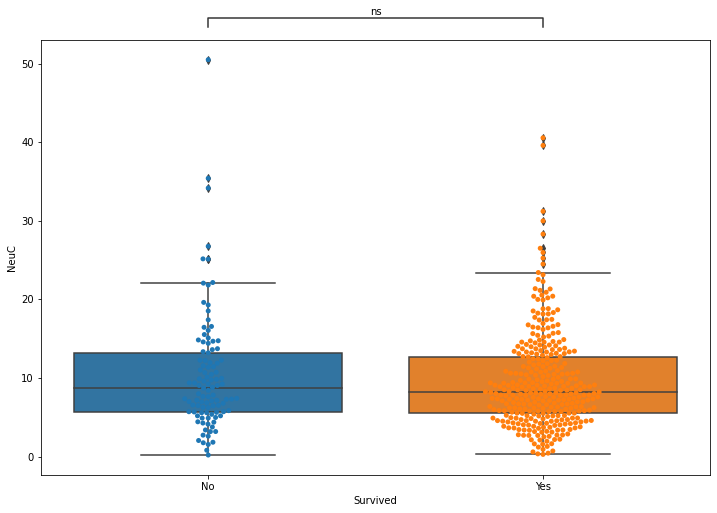

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.013e-01 U_stat=1.761e+04


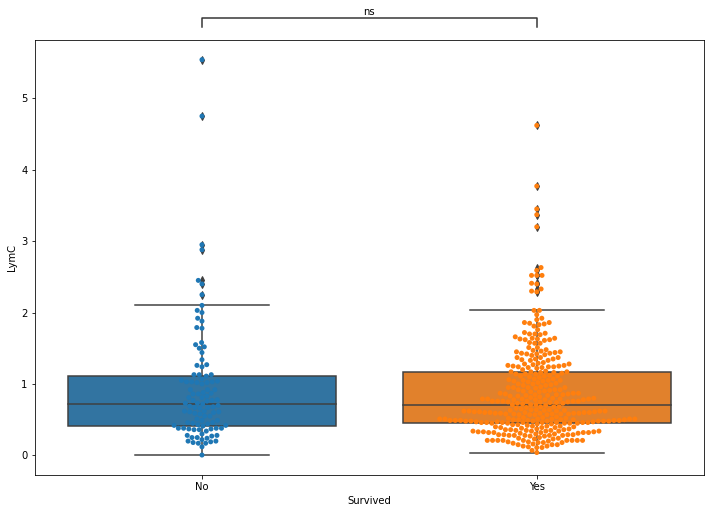

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.557e-01 U_stat=1.812e+04


C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


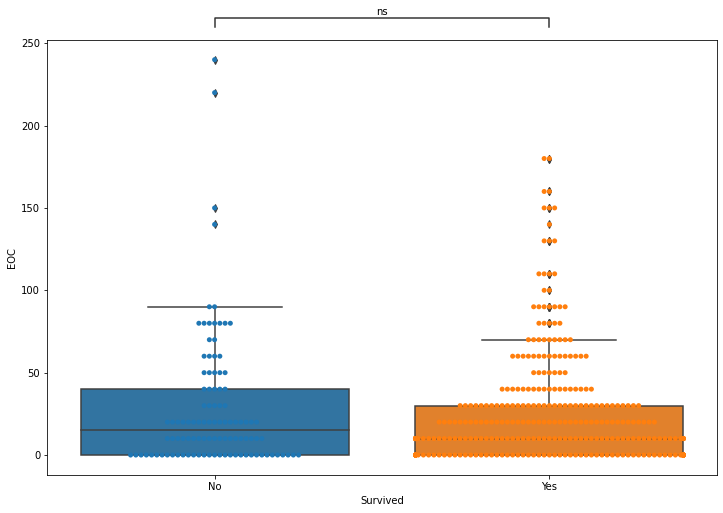

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.089e-01 U_stat=1.775e+04


C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


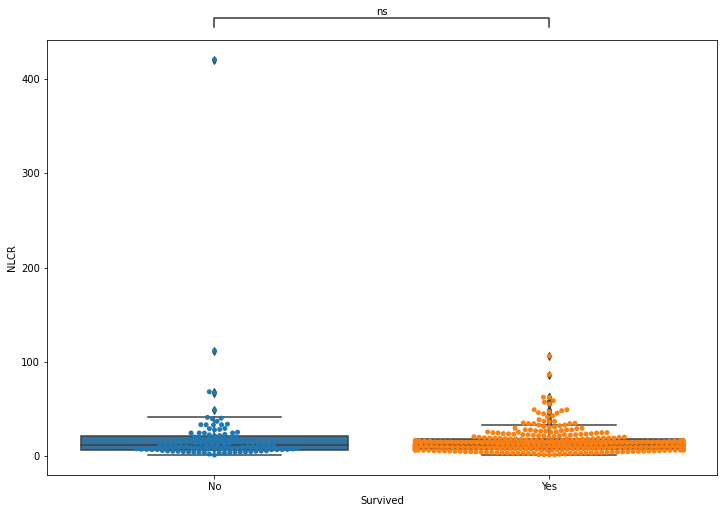

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.452e-02 U_stat=1.545e+04


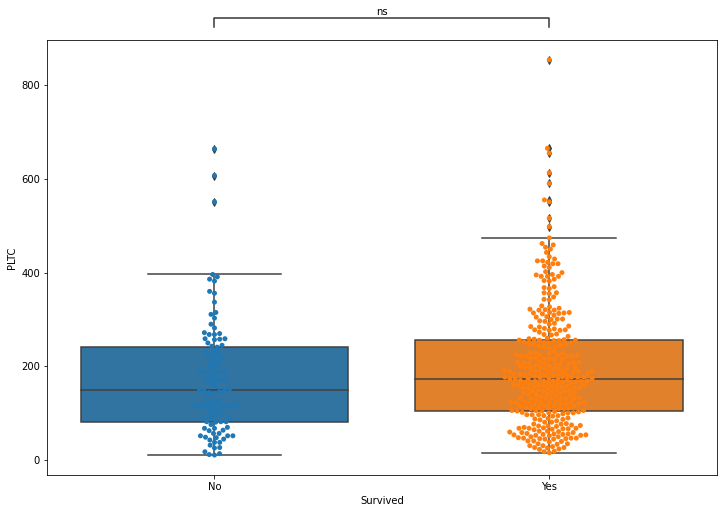

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.241e-01 U_stat=1.692e+04


C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


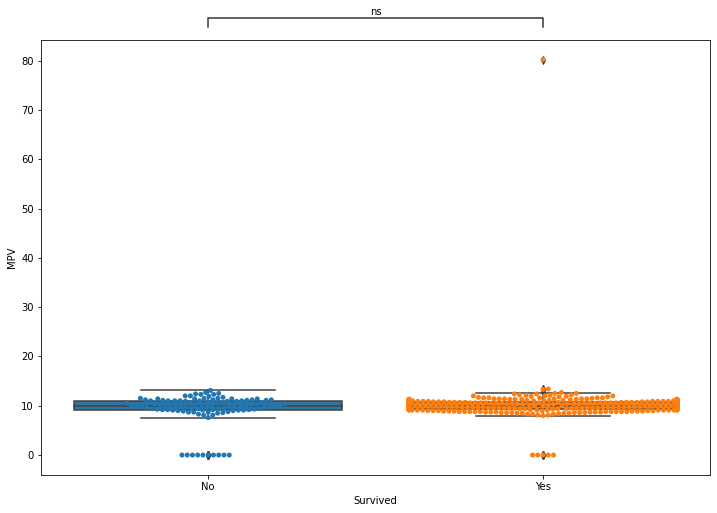

Survival,0.0,1.0
sex,,
E,-8.927273,8.927273
K,8.927273,-8.927273


(3.7122585579786063,
 0.05401425574090733,
 1,
 array([[ 61.92727273, 200.07272727],
        [ 42.07272727, 135.92727273]]))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.047e-01 stat=3.144e+00
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=5.033e-02
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=6.633e-01
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.173e+00


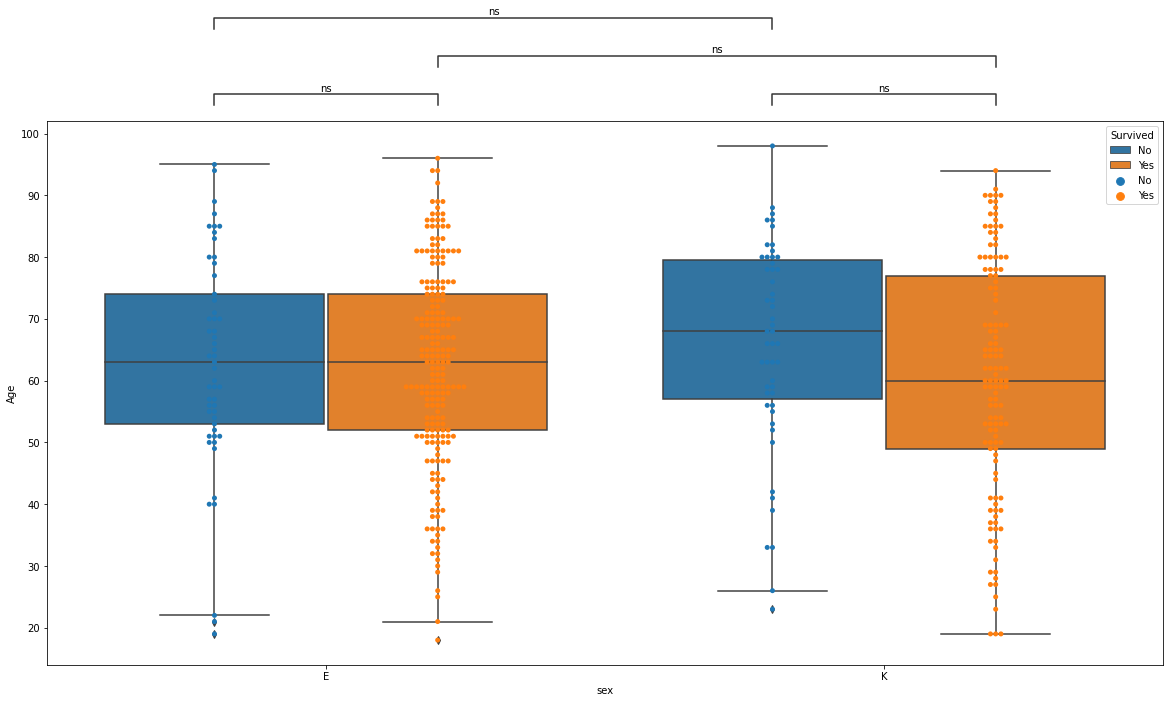

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.920e-12 stat=5.229e+01
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=8.921e-14 stat=5.832e+01
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.445e-01 stat=1.964e+00
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.265e-01 stat=2.273e+00


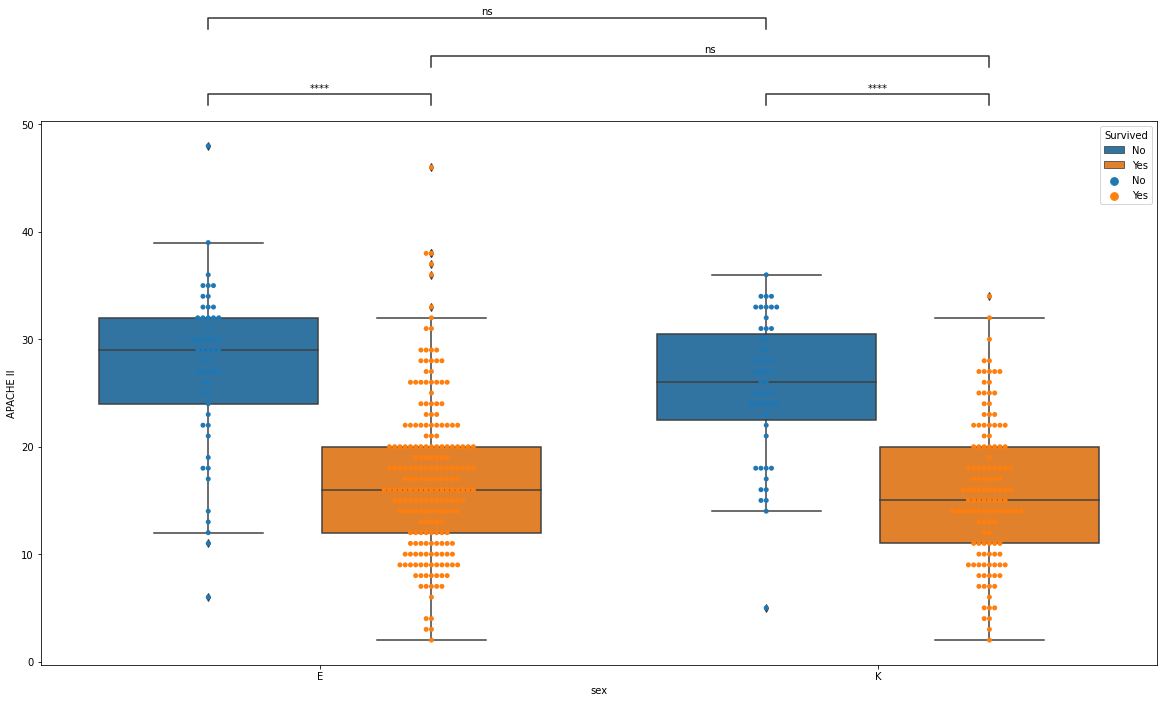

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.469e-14 stat=6.187e+01
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.797e-13 stat=5.547e+01
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=9.645e-01 stat=1.374e+00
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=9.128e-01


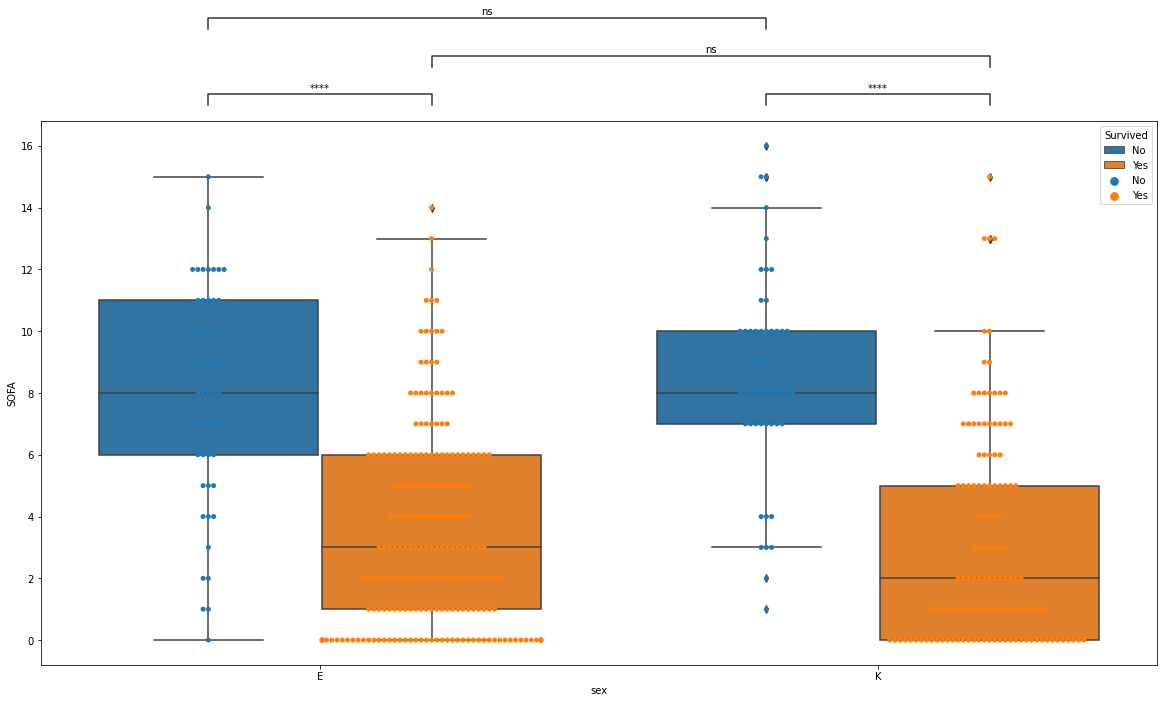

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=9.536e-01
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.166e-01 stat=3.082e+00
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=7.111e-01
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.201e+00


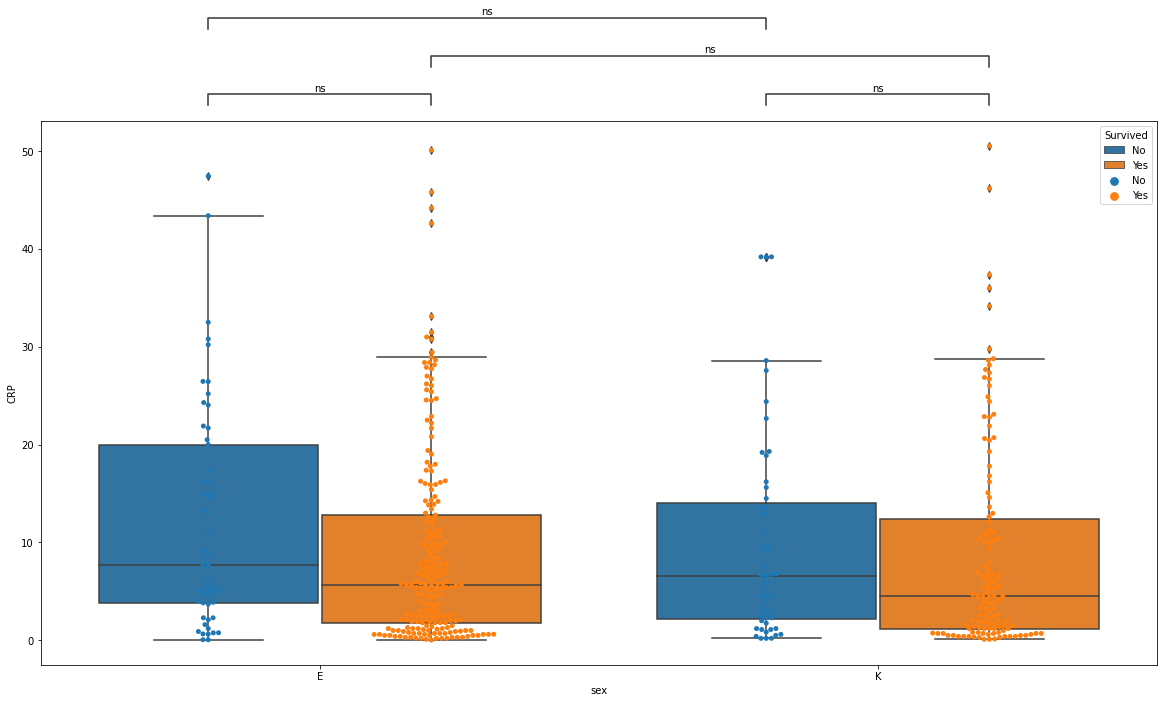

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.189e+00
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.402e-01
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=9.433e-01 stat=1.405e+00
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.802e-01 stat=1.882e+00


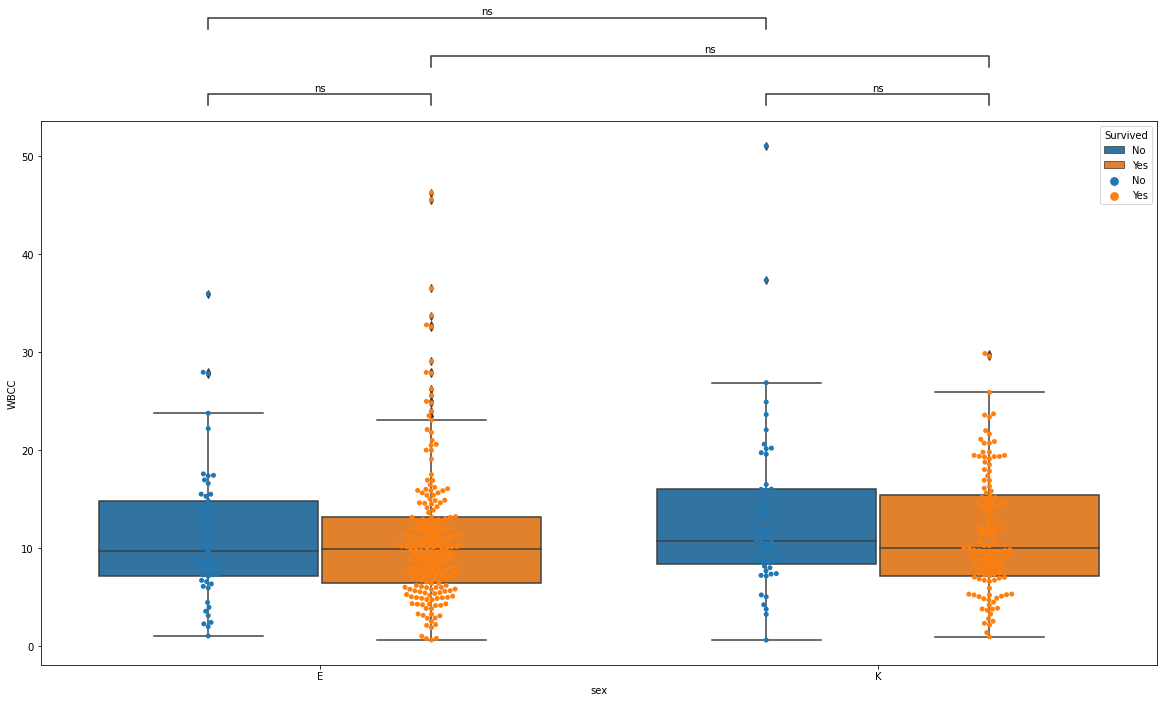

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=5.595e-01
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.119e-06
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.415e-01 stat=1.971e+00
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.329e-01 stat=1.991e+00


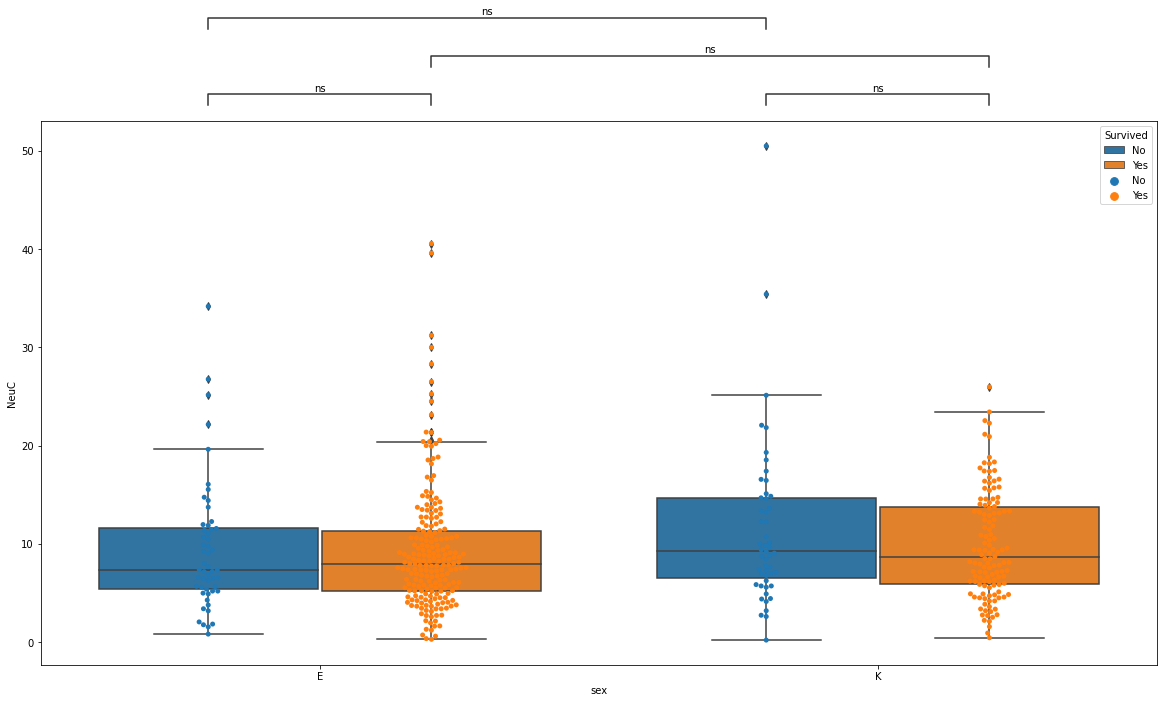

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.224e-01
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.350e-01
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.857e-01
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.955e-01


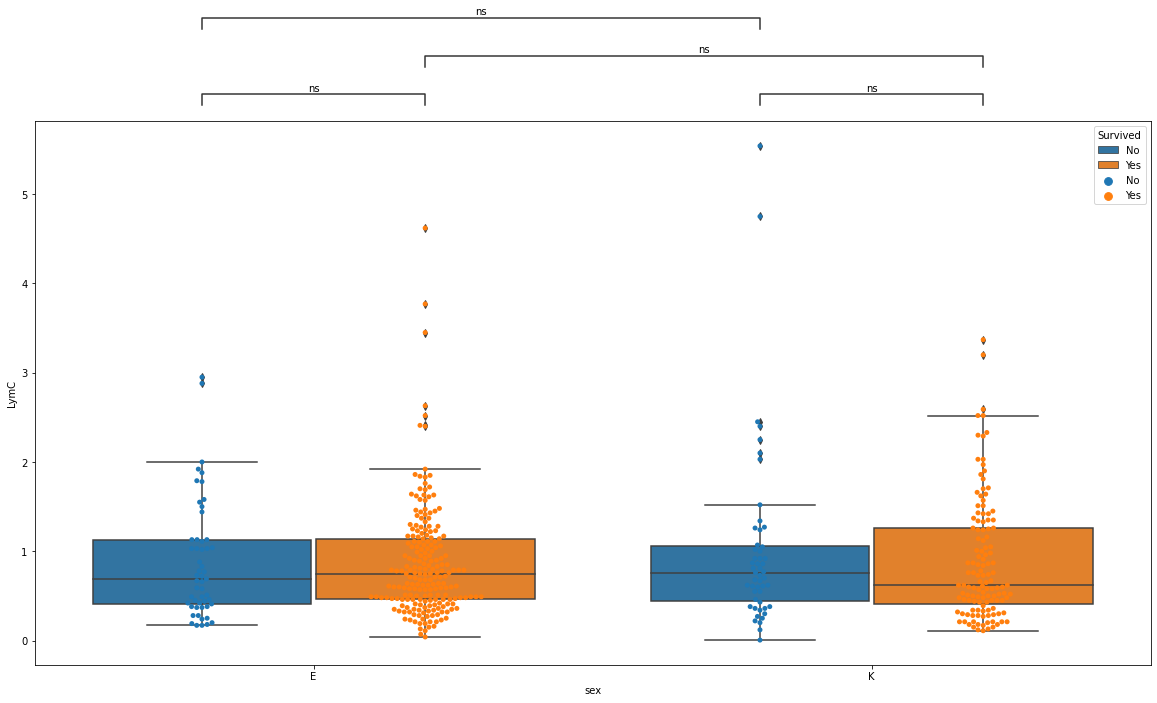

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.353e-01 stat=1.985e+00
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.327e-01
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.072e+00
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=5.697e-01


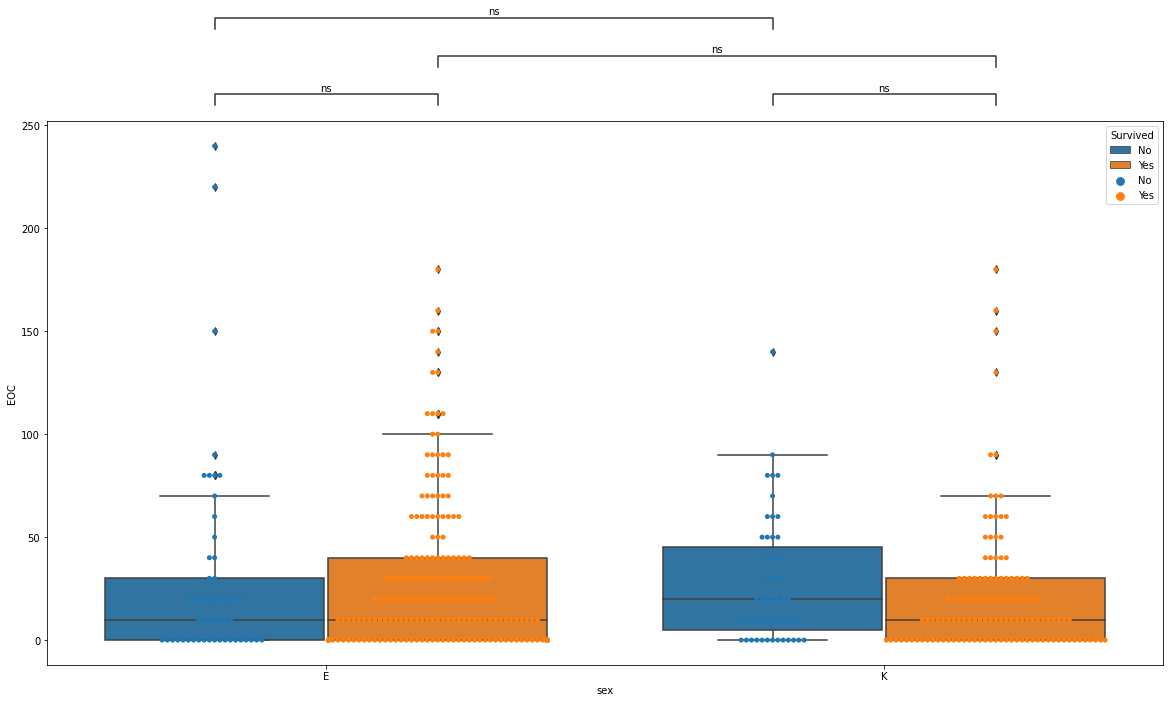

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=7.924e-02
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.317e-02
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=8.473e-01 stat=1.559e+00
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.103e+00


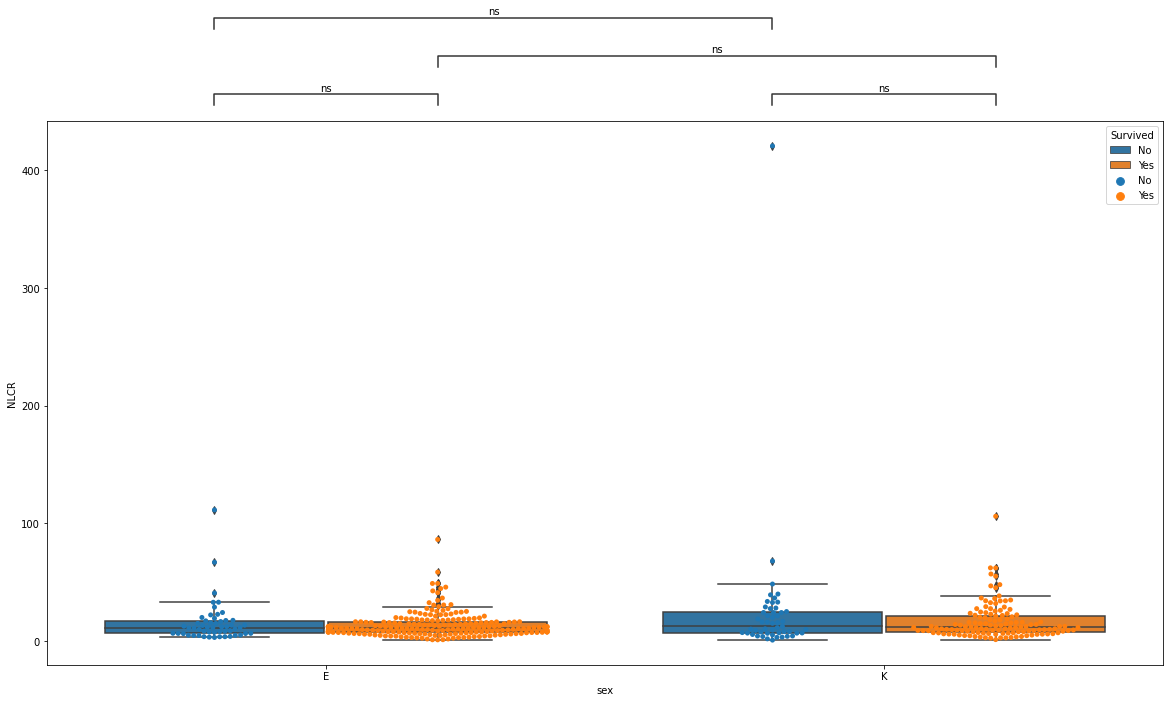

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.590e-01 stat=2.181e+00
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.226e+00
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.287e-01
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.188e-01


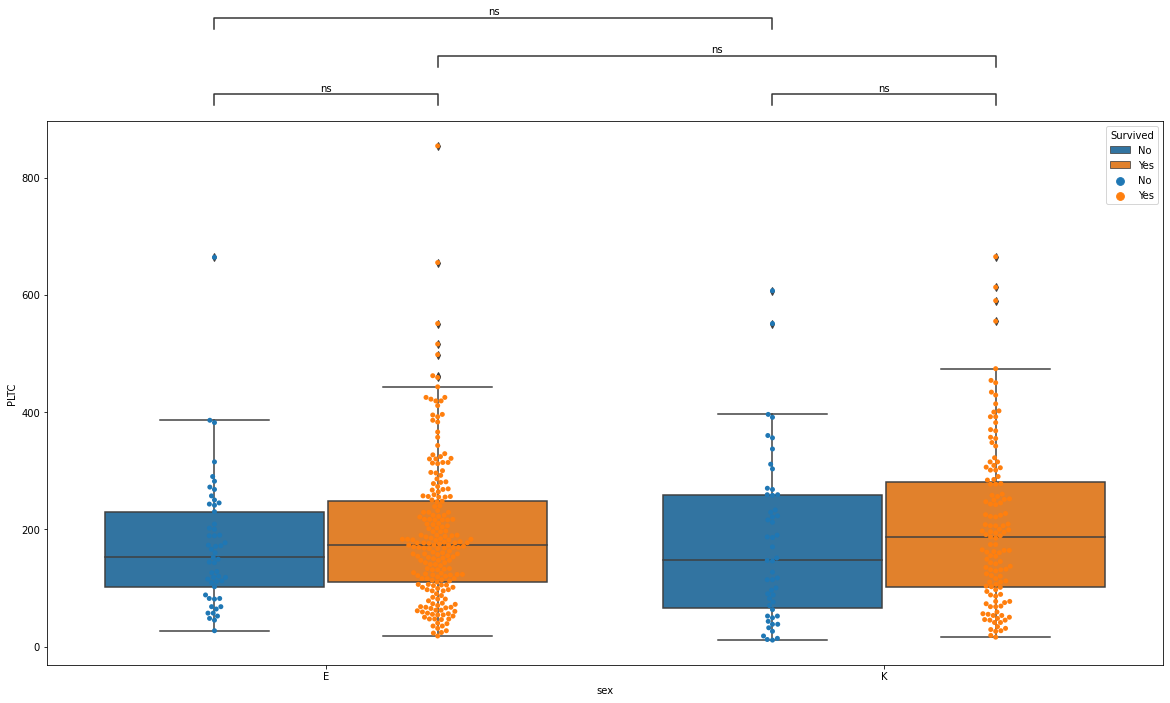

C:\Users\maxim\OneDrive - Politecnico di Milano\DOTTORATO\CANADA\sepsis2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

K_No v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.757e-02 stat=5.989e+00
E_No v.s. E_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.219e-01 stat=3.668e+00
E_Yes v.s. K_Yes: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.904e-01
E_No v.s. K_No: Kruskal-Wallis paired samples with Bonferroni correction, P_val=4.597e-03 stat=1.057e+01


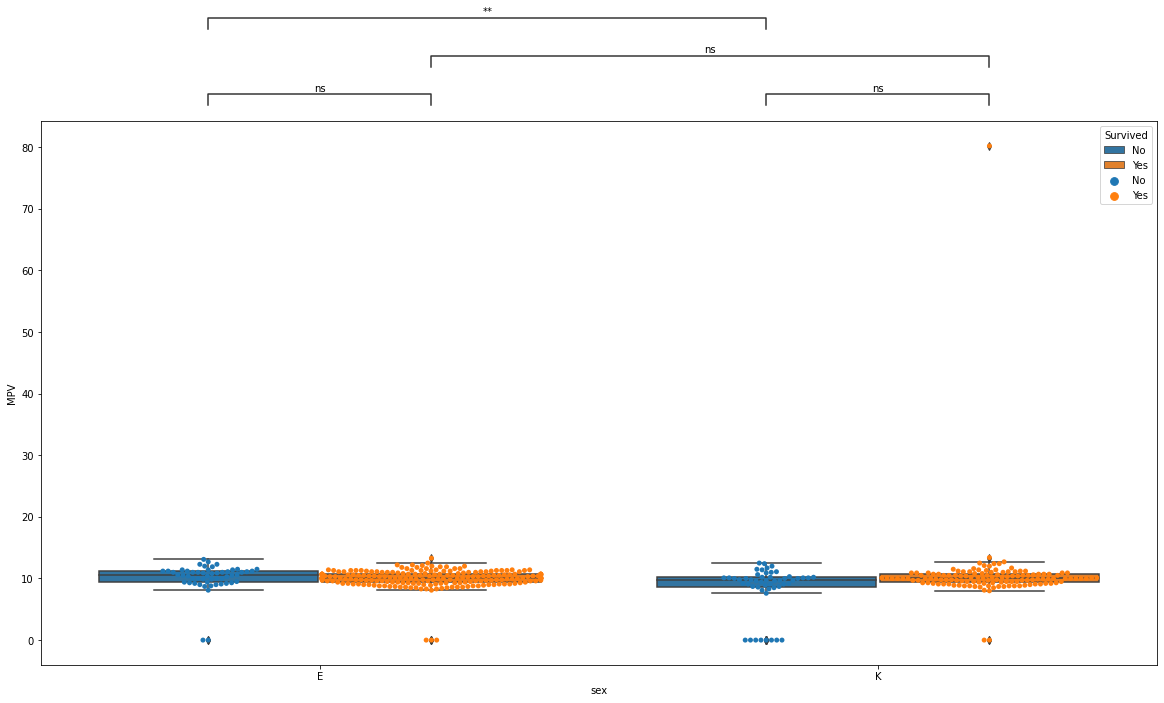

In [13]:
import scipy.stats as stats

"""'Age', 'Gender', 'Diagnosis', 'APACHE II', 'SOFA', 'CRP', 'WBCC',
'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV', 'Group', 'LOS-ICU',
'Mortality', 'Survival, sex'"""

cont_vars=['Age','APACHE II', 'SOFA', 'CRP', 'WBCC','NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
DS=DS_SEPSIS.copy()
DS['Survived']=['Yes' if i==1 else 'No' for i in DS['Survival']]

for i in cont_vars:

    plt.figure(figsize=(12,8))
    ax=sns.swarmplot(x='Survived',y=i,data=DS,size=5,dodge=True)
    sns.boxplot(y=i,x='Survived',data=DS,ax=ax)

    add_stat_annotation(ax, data=DS, y=i,x='Survived',
                        box_pairs=[('Yes','No')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
    plt.show()

ctab=pd.crosstab(DS['sex'],DS['Survival'])
chi,p,dof,etab=stats.chi2_contingency(ctab)
rtab=ctab-etab
display(rtab)
display(stats.chi2_contingency(ctab))

for i in cont_vars:

    plt.figure(figsize=(20,10))
    ax=sns.swarmplot(x='sex',y=i,hue='Survived',data=DS,size=5,dodge=True)
    sns.boxplot(x='sex',y=i,hue='Survived',data=DS,ax=ax)

    add_stat_annotation(ax, data=DS, x='sex',y=i,hue='Survived',
                        box_pairs=[(('E', 'Yes'),('E', 'No')),(('K','Yes'),('K','No')),
                                  (('E', 'Yes'),('K', 'Yes')),(('E','No'),('K','No'))],
                        test='Kruskal',comparisons_correction='bonferroni', text_format='star', loc='outside', verbose=2)
    plt.show()



In [14]:
def runML(X,y,seed_value=42,clf_num=None):


    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    import xgboost as xgb
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import matthews_corrcoef, make_scorer, precision_recall_curve, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import cross_val_score, cross_validate
    from imblearn.over_sampling import RandomOverSampler,SMOTE

    def bootstrapped_auc(y_true, y_pred, n_bootstraps = 1000, rng_seed = 42):

        import numpy as np
        from scipy.stats import sem
        from sklearn.metrics import precision_recall_curve,roc_curve, auc

        auroc_bootstrapped_scores=[]
        auprc_bootstrapped_scores=[]

        rng = np.random.RandomState(rng_seed)

        for i in range(n_bootstraps):
            # bootstrap by sampling with replacement on the prediction indices
            indices = rng.randint(0, len(y_pred), len(y_pred))
            #print(indices)
            if len(np.unique(y_true[indices])) < 2:
                # We need at least one positive and one negative sample for ROC AUC
                # to be defined: reject the sample
                continue

            roc_auc = roc_auc_score(y_true[indices], y_pred[indices])
            auroc_bootstrapped_scores.append(roc_auc)

            precision, recall, _ = precision_recall_curve(y_true[indices], y_pred[indices])
            prc_auc = auc(recall,precision)
            auprc_bootstrapped_scores.append(prc_auc)
            '''print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))'''

        sorted_auroc_scores = np.array(auroc_bootstrapped_scores)
        sorted_auroc_scores.sort()
        sorted_auprc_scores = np.array(auprc_bootstrapped_scores)
        sorted_auprc_scores.sort()

        # Computing the lower and upper bound of the 95% CI
        auroc_confidence_lower = sorted_auroc_scores[int(0.025 * len(sorted_auroc_scores))]
        auroc_confidence_upper = sorted_auroc_scores[int(0.975 * len(sorted_auroc_scores))]
        auprc_confidence_lower = sorted_auprc_scores[int(0.025 * len(sorted_auprc_scores))]
        auprc_confidence_upper = sorted_auprc_scores[int(0.975 * len(sorted_auprc_scores))]
        '''print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
            confidence_lower, confidence_upper))'''

        return auroc_confidence_lower, auroc_confidence_upper, auprc_confidence_lower, auprc_confidence_upper


    CV=3
    calCV=10

    # Train-Test Split
    X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, stratify=y)

    oversample = SMOTE(sampling_strategy='minority',random_state=42)
    X_train, y_train = oversample.fit_resample(X_train0, y_train0)
    
    #print('Train Shape: '+str(X_train.shape))
    #print('GridSearch Train Shape: '+str(X_train.shape[0]*(CV-1)/CV))
    #print('Calibrator Train Shape: '+str(X_train.shape[0]*((CV-1)/CV)*((calCV-1)/calCV)))
    #print('Test Shape: '+str(X_test.shape))

    weight_ratio = float(len(y_train[y_train == 1]))/float(len(y_train[y_train == 0]))
    w_array = np.array([1]*y_train.shape[0])
    w_array[y_train==1] = weight_ratio
    w_array[y_train==0] = 1- weight_ratio
    
    list_classifiers=['SVC_lin','LR','TREE','RF','XGB']
    models=[SVC(kernel='linear',probability=True, random_state=seed_value,class_weight='balanced'), #C
            LogisticRegression(penalty='l2',class_weight='balanced'),
            DecisionTreeClassifier(random_state=seed_value,class_weight='balanced'),
            RandomForestClassifier(random_state=seed_value,class_weight='balanced'),
            xgb.XGBClassifier(base_score=0.5,eval_metric='logloss', colsample_bylevel=1, 
                              colsample_bytree=1,gamma=0, max_delta_step=0,min_child_weight=1, 
                              missing=1, nthread=-1,objective='binary:logistic', reg_alpha=0, 
                              reg_lambda=1,scale_pos_weight=1/weight_ratio, seed=seed_value, 
                              subsample=1,use_label_encoder=False)]
    
    if (clf_num is None):
        clf_list=list_classifiers
        classifiers=models
    else:
        clf_list=[list_classifiers[clf_num]]
        classifiers=[models[clf_num]]
        
    
    
    
    scal=RobustScaler()


    y_proba_te=[]
    RESULTS_test=pd.DataFrame()
    
    mcc_scorer=make_scorer(matthews_corrcoef)

    for classifier,clf_lst in zip(classifiers,clf_list):
        
        #print(clf_lst)
        pipe = Pipeline(steps=[('scaler', RobustScaler()),('classifier',classifier)])
        # Compute CV score
        CVscores = cross_val_score(pipe, X_train, y_train, cv=CV, scoring=mcc_scorer)
        
        # ReFit        
        search=pipe.fit(X_train.copy(), np.array(y_train.copy()))

        # Best Estimator Etraction

        y_proba_tr=search.predict_proba(X_train.copy())
        y_proba_te.append(search.predict_proba(X_test.copy())) # Compute Probabilities

        # Plot Performance Measures at Each Cycle
        # AUROC
        fpr0, tpr0, _ = roc_curve(y_train, y_proba_tr[:, 1])
        roc_auc0 = auc(fpr0, tpr0)
        fpr, tpr, _ = roc_curve(y_test, y_proba_te[-1][:, 1])
        roc_auc = auc(fpr, tpr)
        
        # AUPRC
        precision0, recall0, _ = precision_recall_curve(y_train, y_proba_tr[:, 1])
        prc_auc0= auc(recall0,precision0)
        precision, recall, _ = precision_recall_curve(y_test, y_proba_te[-1][:, 1])
        prc_auc = auc(recall,precision)

        # Compute Bootstrapped Confidence Intervals
        auroc_cilw0, auroc_ciup0, auprc_cilw0, auprc_ciup0=bootstrapped_auc(np.array(y_train), y_proba_tr[:, 1],
                                                                            n_bootstraps = 1000, rng_seed = 0)
        auroc_cilw, auroc_ciup, auprc_cilw, auprc_ciup=bootstrapped_auc(np.array(y_test), y_proba_te[-1][:, 1],
                                                                        n_bootstraps = 1000, rng_seed = 0)
        # Extract Optimal Threshold
        cm=confusion_matrix(y_test, y_proba_te[-1][:,1]>0.5)
        tn, fp, fn, tp=confusion_matrix(y_test, y_proba_te[-1][:,1]>0.5).ravel()
        
        mcc=matthews_corrcoef(y_test,y_proba_te[-1][:,1]>0.5)
        
        dic={'Classifier':clf_lst,'Calibrated':search,'CVScore_avg':CVscores.mean(),'CVScore':CVscores,'Pipeline':pipe,
             'MCC': mcc,'AUROC':round(roc_auc,4),'AUROC_CI':[round(auroc_cilw,4), round(auroc_ciup,4)],
             'AUPRC':round(prc_auc,4),'AUPRC_CI':[round(auprc_cilw,4), round(auprc_ciup,4)],
             'Threshold':0.5,'CM':cm,'TP':tp,'FP':fp,'TN':tn,'FN':fn,'SE':tp/(tp+fn),'SP':tn/(tn+fp),'ACC':(tp+tn)/(tp+tn+fp+fn)}
        df_temp=pd.DataFrame.from_dict(data=dic, orient='index').transpose()
        RESULTS_test=RESULTS_test.append(df_temp, ignore_index=True)
        
        
    return RESULTS_test

In [15]:
DATASET=DS_SEPSIS[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV','Survival']].dropna().copy()
X=DATASET[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']].copy()
X.loc[X['sex']=='K','sex2']=1
X.loc[X['sex']=='E','sex2']=0
X['sex2']=X['sex2'].astype(int)
y=DATASET['Survival']

print('Died: '+str(sum(DS_SEPSIS['Survival']==0)/len(DS_SEPSIS['Survival'])))
print('Died: '+str(sum(DS_SEPSIS['Survival']==0)))

RESULTS_SEPSIS_ALL=[]
for i in np.arange(0,100):
    #print(i)
    run_SEPSIS_ALL=runML(X[['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']],y,seed_value=i)
    RESULTS_SEPSIS_ALL.append(run_SEPSIS_ALL)   

dump(RESULTS_SEPSIS_ALL,'ReRun_ALL/RESULTS_SEPSIS_ALL_smote')

RESULTS_SEPSIS_ALL_sorted=[i.sort_values(by='CVScore_avg',ascending=False) for i in RESULTS_SEPSIS_ALL]


#RESULTS_SEPSIS_ALL_sorted[0].Pipeline[1]['classifier'].coef_

Died: 0.23636363636363636
Died: 104


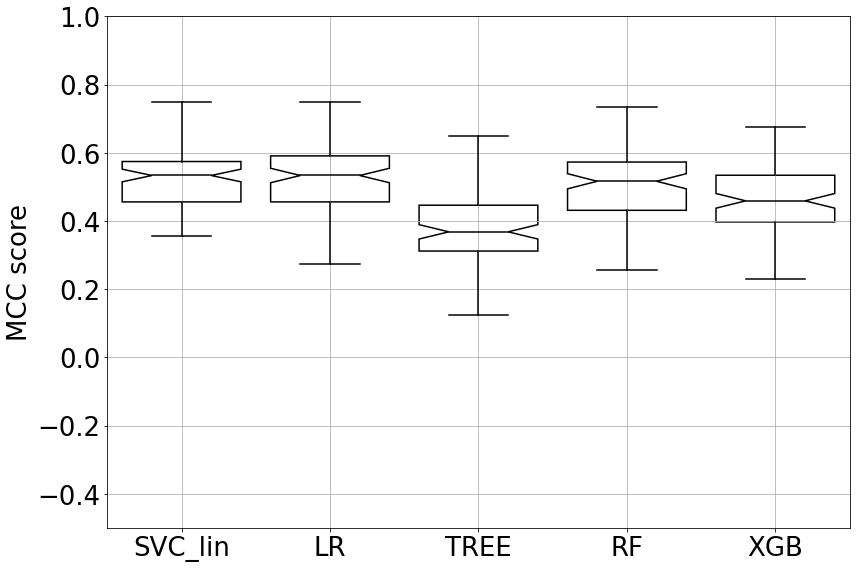

In [44]:
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


# Load Results
RESULTS_SEPSIS_ALL=load('ReRun_ALL/RESULTS_SEPSIS_ALL_smote')
#RESULTS_SEPSIS_ALL
#RESULTS_SEPSIS_ALL[0]

# List of Algorithms
clfs=RESULTS_SEPSIS_ALL[0].Classifier
#clfs
clfs_dict={i:clfs[i] for i in range(len(clfs))}
#clfs_dict

# Store MCC scores in array/dataframe
mcc_scores_arr=np.array([i.MCC.to_list() for i in RESULTS_SEPSIS_ALL])
#mcc_scores_arr

mcc_scores_df=pd.DataFrame([i.MCC.to_list() for i in RESULTS_SEPSIS_ALL])
mcc_scores_df=mcc_scores_df.rename(columns=clfs_dict)
#display(mcc_scores_df.shape)

mcc_scores_df_SEPSIS=mcc_scores_df.copy()

# Plot MCC Scores
plt.figure(figsize=(12,8))
ax=sns.boxplot(data=mcc_scores_df,notch=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.set_xticklabels(mcc_scores_df.columns)
ax.set_ylabel('MCC score',fontsize=label_size)
ax.set_ylim([-0.5,1])
#plt.title('Sepsis Prediction - SMOTE-Observation Weighting',fontsize=label_size)
plt.tight_layout()
plt.grid()
plt.savefig('ReRun_ALL/Boxplot_MCC_SEPSIS_smote.png',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_SEPSIS_smote.eps',format='eps',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_SEPSIS_smote.svg',format='svg',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_SEPSIS_smote.pdf',format='pdf',dpi=300)
plt.show()

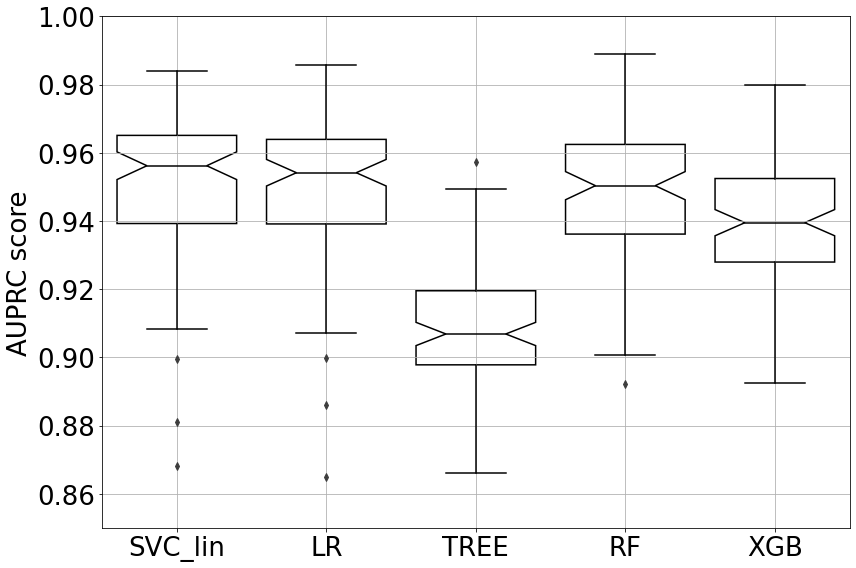

In [43]:
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


# Load Results
RESULTS_SEPSIS_ALL=load('ReRun_ALL/RESULTS_SEPSIS_ALL_smote')
#RESULTS_SEPSIS_ALL
#RESULTS_SEPSIS_ALL[0]


# List of Algorithms
clfs=RESULTS_SEPSIS_ALL[0].Classifier
#clfs
clfs_dict={i:clfs[i] for i in range(len(clfs))}
#clfs_dict

# Store MCC scores in array/dataframe
auprc_scores_arr=np.array([i.AUPRC.to_list() for i in RESULTS_SEPSIS_ALL])
#mcc_scores_arr

auprc_scores_df=pd.DataFrame([i.AUPRC.to_list() for i in RESULTS_SEPSIS_ALL])
auprc_scores_df=auprc_scores_df.rename(columns=clfs_dict)
#display(mcc_scores_df.shape)

auprc_scores_df_SEPSIS=auprc_scores_df.copy()

# Plot MCC Scores
plt.figure(figsize=(12,8))
ax=sns.boxplot(data=auprc_scores_df,notch=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.set_xticklabels(auprc_scores_df.columns)
ax.set_ylabel('AUPRC score',fontsize=label_size)
ax.set_ylim([0.85,1])
#plt.title('Sepsis Prediction - SMOTE-Observation Weighting',fontsize=label_size)
plt.tight_layout()
plt.grid()
plt.savefig('ReRun_ALL/Boxplot_AUPRC_SEPSIS_smote.png',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_AUPRC_SEPSIS_smote.eps',format='eps',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_AUPRC_SEPSIS_smote.svg',format='svg',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_AUPRC_SEPSIS_smote.pdf',format='pdf',dpi=300)

plt.show()

In [19]:
RESULTS_SEPSIS_ALL[0]

,Classifier,Calibrated,CVScore_avg,CVScore,Pipeline,MCC,AUROC,AUROC_CI,AUPRC,AUPRC_CI,Threshold,CM,TP,FP,TN,FN,SE,SP,ACC
0,SVC_lin,"(RobustScaler(), SVC(class_weight='balanced', ...",0.630243,"[0.5238089861115296, 0.7326338890058322, 0.634...","(RobustScaler(), SVC(class_weight='balanced', ...",0.705062,0.9424,"[0.893, 0.9814]",0.9832,"[0.9638, 0.9953]",0.5,"[[19, 2], [9, 58]]",58,2,19,9,0.865672,0.904762,0.875
1,LR,"(RobustScaler(), LogisticRegression(class_weig...",0.623233,"[0.5142956348249517, 0.7211190714718217, 0.634...","(RobustScaler(), LogisticRegression(class_weig...",0.705062,0.9303,"[0.8711, 0.9792]",0.978,"[0.9523, 0.995]",0.5,"[[19, 2], [9, 58]]",58,2,19,9,0.865672,0.904762,0.875
2,TREE,"(RobustScaler(), DecisionTreeClassifier(class_...",0.635404,"[0.5918556023193138, 0.6334407178609501, 0.680...","(RobustScaler(), DecisionTreeClassifier(class_...",0.397074,0.7125,"[0.5937, 0.8265]",0.9123,"[0.8564, 0.9588]",0.5,"[[13, 8], [13, 54]]",54,8,13,13,0.80597,0.619048,0.761364
3,RF,"(RobustScaler(), (DecisionTreeClassifier(max_f...",0.717827,"[0.627827941063225, 0.7366093706882143, 0.7890...","(RobustScaler(), (DecisionTreeClassifier(max_f...",0.661852,0.9463,"[0.8933, 0.9886]",0.9824,"[0.9606, 0.9966]",0.5,"[[16, 5], [6, 61]]",61,5,16,6,0.910448,0.761905,0.875
4,XGB,"(RobustScaler(), XGBClassifier(base_score=0.5,...",0.731823,"[0.6298897789321866, 0.8121344935599345, 0.753...","(RobustScaler(), XGBClassifier(base_score=0.5,...",0.577109,0.9133,"[0.8413, 0.9709]",0.9721,"[0.9439, 0.9924]",0.5,"[[15, 6], [8, 59]]",59,6,15,8,0.880597,0.714286,0.840909


In [20]:
DATASET=DS_SEPSIS[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV','Survival']].dropna().copy()
X=DATASET[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']].copy()
X.loc[X['sex']=='K','sex2']=1
X.loc[X['sex']=='E','sex2']=0
X['sex2']=X['sex2'].astype(int)
y=DATASET['Survival']

lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']

#[0:'SVC_lin',1:'LR',2:'TREE',3:'RF',4:'XGB']

ITER_RESULTS_SEPSIS_RFE=[]
for j in np.arange(0,100):
    RESULTS_SEPSIS_RFE=[]
    for i in lst:
        #print(i)
        Xtemp=X[lst].copy()
        Xtemp=Xtemp.drop(columns=i)
        #display(Xtemp)
        RESULTS_SEPSIS_RFE.append(runML(Xtemp,y,seed_value=j,clf_num=1))  # clf_num must be substituted with the best performing model   
    ITER_RESULTS_SEPSIS_RFE.append(RESULTS_SEPSIS_RFE)

dump(ITER_RESULTS_SEPSIS_RFE,'ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_LR')

#ITER_RESULTS_SEPSIS_RFE
    

['ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_LR']

In [21]:
DATASET=DS_SEPSIS[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV','Survival']].dropna().copy()
X=DATASET[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']].copy()
X.loc[X['sex']=='K','sex2']=1
X.loc[X['sex']=='E','sex2']=0
X['sex2']=X['sex2'].astype(int)
y=DATASET['Survival']

lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']

#[0:'SVC_lin',1:'LR',2:'TREE',3:'RF',4:'XGB']

ITER_RESULTS_SEPSIS_RFE=[]
for j in np.arange(0,100):
    RESULTS_SEPSIS_RFE=[]
    for i in lst:
        #print(i)
        Xtemp=X[lst].copy()
        Xtemp=Xtemp.drop(columns=i)
        #display(Xtemp)
        RESULTS_SEPSIS_RFE.append(runML(Xtemp,y,seed_value=j,clf_num=4))  # clf_num must be substituted with the best performing model   
    ITER_RESULTS_SEPSIS_RFE.append(RESULTS_SEPSIS_RFE)

dump(ITER_RESULTS_SEPSIS_RFE,'ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_XGB')

#ITER_RESULTS_SEPSIS_RFE
    

['ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_XGB']

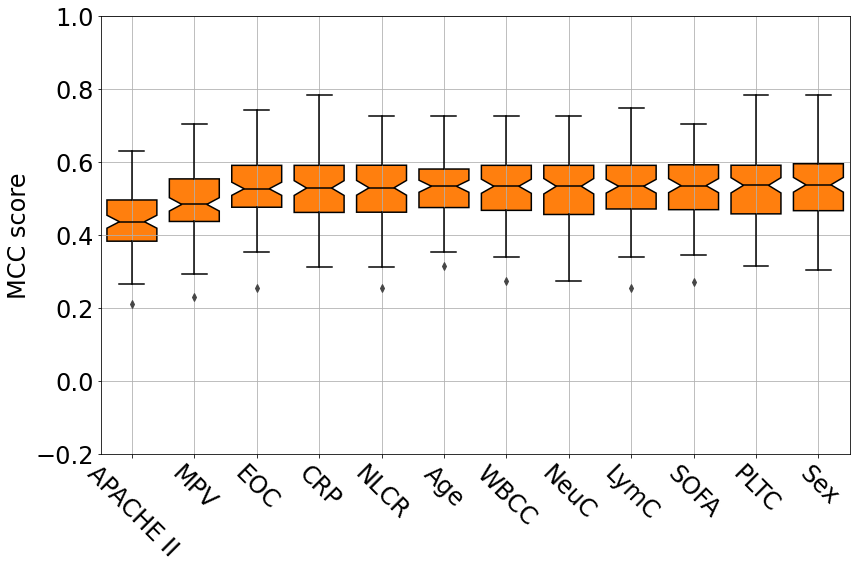

In [3]:
import matplotlib as mpl
label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
ITER_RESULTS_SEPSIS_RFE_LR=load('ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_LR')
MCC_RFE_SEPSIS_LR=pd.DataFrame([[i[j].MCC[0] for j in range(len(i))] for i in ITER_RESULTS_SEPSIS_RFE_LR])
MCC_RFE_SEPSIS_LR=MCC_RFE_SEPSIS_LR.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SEPSIS_LR=MCC_RFE_SEPSIS_LR.rename(columns={'sex2':'Sex'})

# Plot MCC Scores
plt.figure(figsize=(12,8))

ax=sns.boxplot(data=MCC_RFE_SEPSIS_LR[MCC_RFE_SEPSIS_LR.median().sort_values().index],notch=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='tab:orange')
plt.setp(ax.lines, color='k')
ax.set_xticklabels(MCC_RFE_SEPSIS_LR.median().sort_values().index)
ax.set_ylabel('MCC score',fontsize=label_size)
ax.set_ylim([-0.2,1])
plt.xticks(rotation=-45)
#plt.title('MCC after removing a specific variable - LR',fontsize=label_size)
plt.tight_layout()
plt.grid()
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_LR.eps',format='eps',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_LR.pdf',format='pdf',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_LR.svg',format='svg',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_LR.png',dpi=300)
plt.show()

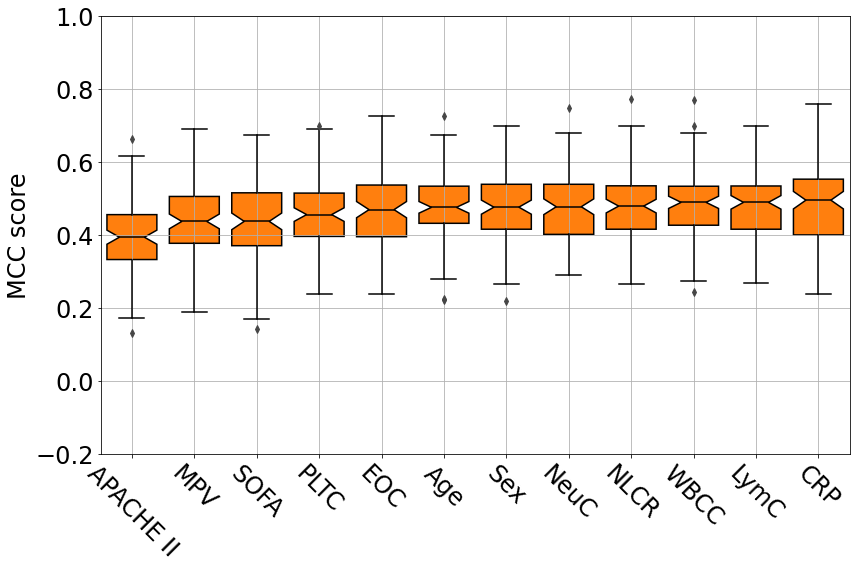

In [5]:
import matplotlib as mpl
label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
ITER_RESULTS_SEPSIS_RFE_XGB=load('ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_XGB')
MCC_RFE_SEPSIS_XGB=pd.DataFrame([[i[j].MCC[0] for j in range(len(i))] for i in ITER_RESULTS_SEPSIS_RFE_XGB])
MCC_RFE_SEPSIS_XGB=MCC_RFE_SEPSIS_XGB.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SEPSIS_XGB=MCC_RFE_SEPSIS_XGB.rename(columns={'sex2':'Sex'})

# Plot MCC Scores
plt.figure(figsize=(12,8))

ax=sns.boxplot(data=MCC_RFE_SEPSIS_XGB[MCC_RFE_SEPSIS_XGB.median().sort_values().index], notch=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='tab:orange')
plt.setp(ax.lines, color='k')
ax.set_xticklabels(MCC_RFE_SEPSIS_XGB.median().sort_values().index)
ax.set_ylabel('MCC score',fontsize=label_size)
ax.set_ylim([-0.2,1])
plt.xticks(rotation=-45)
#plt.title('MCC after removing a specific variable - XGB',fontsize=label_size)
plt.tight_layout()
plt.grid()
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_XGB.eps',format='eps',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_XGB.pdf',format='pdf',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_XGB.svg',format='svg',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SEPSIS_smote_XGB.png',dpi=300)
plt.show()

In [24]:
DATASET2=DS_SIRS[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV','Survival']].dropna().copy()
X=DATASET2[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']].copy()
X.loc[X['sex']=='K','sex2']=1
X.loc[X['sex']=='E','sex2']=0
X['sex2']=X['sex2'].astype(int)
y=DATASET2['Survival']

print('Died: '+str(sum(DS_SIRS['Survival']==0)/len(DS_SIRS['Survival'])))

RESULTS_SIRS_ALL=[]
for i in np.arange(0,100):
    print(i)
    run_SIRS_ALL=runML(X[['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']],y,seed_value=i)
    RESULTS_SIRS_ALL.append(run_SIRS_ALL)   

dump(RESULTS_SIRS_ALL,'ReRun_ALL/RESULTS_SIRS_ALL_smote')

RESULTS_SIRS_ALL_sorted=[i.sort_values(by='CVScore_avg',ascending=False) for i in RESULTS_SIRS_ALL]

#RESULTS_SIRS_ALL_sorted[0].Pipeline[1]['classifier'].coef_


Died: 0.030712530712530713
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


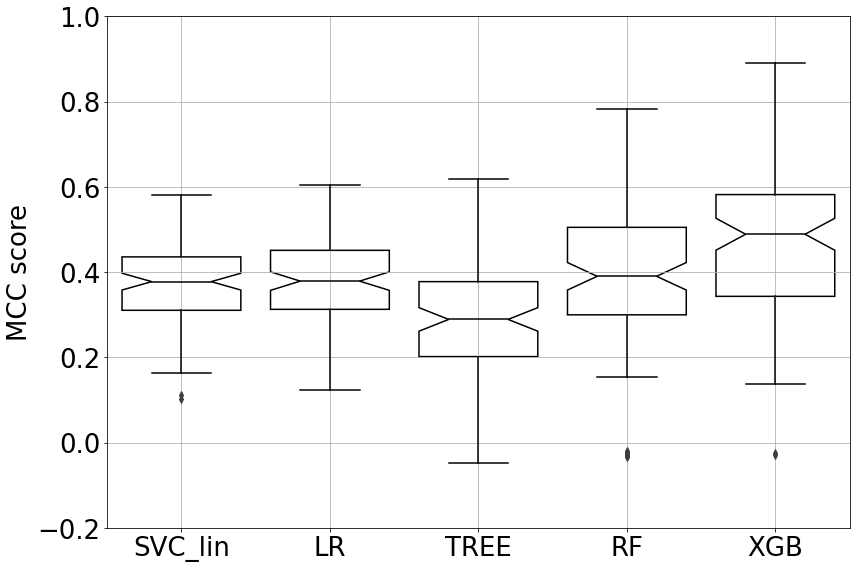

In [25]:
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


# Load Results
RESULTS_SIRS_ALL=load('ReRun_ALL/RESULTS_SIRS_ALL_smote')
RESULTS_SIRS_ALL
RESULTS_SIRS_ALL[0]

# List of Algorithms
clfs=RESULTS_SIRS_ALL[0].Classifier
clfs
clfs_dict={i:clfs[i] for i in range(len(clfs))}
clfs_dict

# Store MCC scores in array/dataframe
mcc_scores_arr=np.array([i.MCC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_arr

mcc_scores_df=pd.DataFrame([i.MCC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_df=mcc_scores_df.rename(columns=clfs_dict)

mcc_scores_df_SIRS=mcc_scores_df.copy()

# Plot MCC Scores
plt.figure(figsize=(12,8))
ax=sns.boxplot(data=mcc_scores_df, notch=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.set_xticklabels(mcc_scores_df.columns)
ax.set_ylabel('MCC score',fontsize=label_size)
ax.set_ylim([-0.2,1])
#plt.title('SIRS Prediction - SMOTE-Observation Weighting',fontsize=label_size)
plt.tight_layout()
plt.grid()

plt.savefig('ReRun_ALL/Boxplot_MCC_SIRS_smote.png',dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


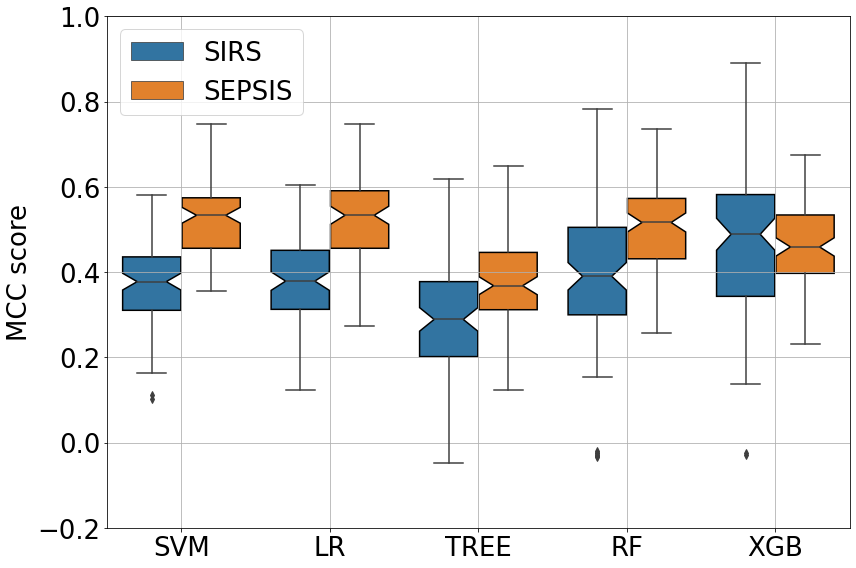

In [13]:
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


# Load Results
RESULTS_SIRS_ALL=load('ReRun_ALL/RESULTS_SIRS_ALL_smote')
RESULTS_SEPSIS_ALL=load('ReRun_ALL/RESULTS_SEPSIS_ALL_smote')

# List of Algorithms
clfs=RESULTS_SIRS_ALL[0].Classifier
clfs
clfs_dict={i:clfs[i] for i in range(len(clfs))}
clfs_dict

# Store MCC scores in array/dataframe
mcc_scores_arr_sirs=np.array([i.MCC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_arr_sepsis=np.array([i.MCC.to_list() for i in RESULTS_SEPSIS_ALL])

mcc_scores_df=pd.DataFrame([i.MCC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_df=mcc_scores_df.rename(columns=clfs_dict)
mcc_scores_df=mcc_scores_df.melt()
mcc_scores_df['Group']='SIRS'
mcc_scores_df_ALL=mcc_scores_df.copy()

mcc_scores_df=pd.DataFrame([i.MCC.to_list() for i in RESULTS_SEPSIS_ALL])
mcc_scores_df=mcc_scores_df.rename(columns=clfs_dict)
mcc_scores_df=mcc_scores_df.melt()
mcc_scores_df['Group']='SEPSIS'
mcc_scores_df_ALL=mcc_scores_df_ALL.append(mcc_scores_df)

mcc_scores_df_ALL.replace({'SVC_lin':'SVM'},inplace=True)

# Plot MCC Scores
plt.figure(figsize=(12,8))
ax=sns.boxplot(data=mcc_scores_df_ALL,x='variable',y='value',hue='Group', 
               palette={"SIRS": "tab:blue", "SEPSIS": "tab:orange"}, notch=True)
plt.setp(ax.artists, edgecolor = 'k')
#plt.setp(ax.lines, color='k')
#ax.set_xticklabels(mcc_scores_df_ALL['variable'].drop_duplicates())
ax.set_xlabel('',fontsize=label_size)
ax.set_ylabel('MCC score',fontsize=label_size)
ax.set_ylim([-0.2,1])
plt.legend(fontsize=label_size)
#plt.title('SIRS Prediction - SMOTE-Observation Weighting',fontsize=label_size)
plt.tight_layout()
plt.grid()

plt.savefig('ReRun_ALL/Boxplot_MCC_ALL_smote.png',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_ALL_smote.eps',format='eps',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_ALL_smote.pdf',format='pdf',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_ALL_smote.svg',format='svg',dpi=300)

plt.show()


In [27]:
mcc_scores_df_ALL.groupby(['variable','Group']).quantile(0.75)

value
variable Group           
LR       SEPSIS  0.590871
         SIRS    0.451108
RF       SEPSIS  0.572867
         SIRS    0.505041
SVM      SEPSIS  0.574353
         SIRS    0.435698
TREE     SEPSIS  0.446215
         SIRS    0.377623
XGB      SEPSIS  0.534047
         SIRS    0.581901

In [28]:
DATASET2=DS_SIRS[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV','Survival']].dropna().copy()
X=DATASET2[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']].copy()
X.loc[X['sex']=='K','sex2']=1
X.loc[X['sex']=='E','sex2']=0
X['sex2']=X['sex2'].astype(int)
y=DATASET2['Survival']

lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']

ITER_RESULTS_SIRS_RFE=[]
for j in np.arange(0,100): #to set a different seed
    RESULTS_SIRS_RFE=[]
    print(j)
    for i in lst: # to drop features
        Xtemp=X[lst].copy()
        Xtemp=Xtemp.drop(columns=i)
        #display(Xtemp)
        RESULTS_SIRS_RFE.append(runML(Xtemp,y,seed_value=j,clf_num=4) )  # clf_num must be substituted with the best performing model 
    ITER_RESULTS_SIRS_RFE.append(RESULTS_SIRS_RFE)
    
#ITER_RESULTS_SIRS_RFE    
    
dump(ITER_RESULTS_SIRS_RFE,'ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_XGB')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


['ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_XGB']

In [29]:
DATASET2=DS_SIRS[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV','Survival']].dropna().copy()
X=DATASET2[['Age', 'sex','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']].copy()
X.loc[X['sex']=='K','sex2']=1
X.loc[X['sex']=='E','sex2']=0
X['sex2']=X['sex2'].astype(int)
y=DATASET2['Survival']

lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']

#[0:'SVC_lin',1:'LR',2:'TREE',3:'RF',4:'XGB']

ITER_RESULTS_SIRS_RFE=[]
for j in np.arange(0,100): #to set a different seed
    RESULTS_SIRS_RFE=[]
    print(j)
    for i in lst: # to drop features
        Xtemp=X[lst].copy()
        Xtemp=Xtemp.drop(columns=i)
        #display(Xtemp)
        RESULTS_SIRS_RFE.append(runML(Xtemp,y,seed_value=j,clf_num=1) )  # clf_num must be substituted with the best performing model 
    ITER_RESULTS_SIRS_RFE.append(RESULTS_SIRS_RFE)
    
#ITER_RESULTS_SIRS_RFE    
    
dump(ITER_RESULTS_SIRS_RFE,'ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_LR')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


['ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_LR']

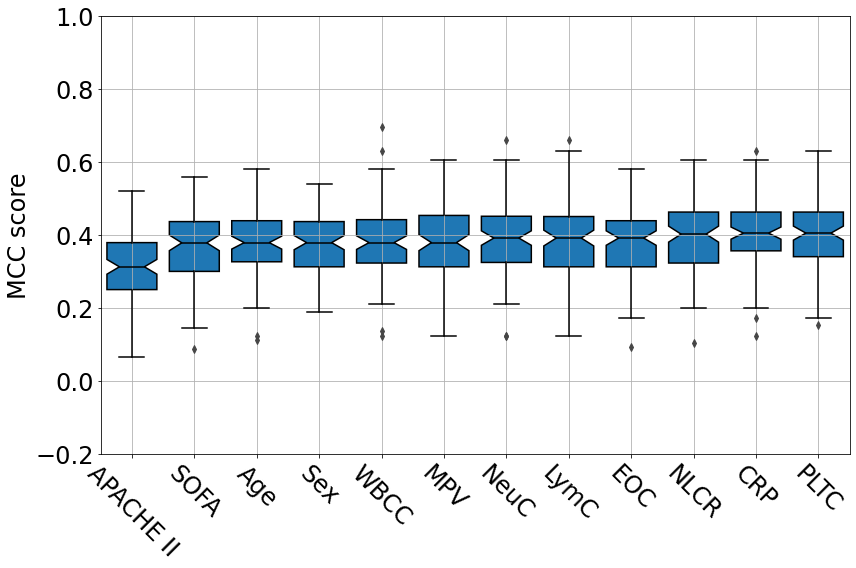

In [7]:
import matplotlib as mpl
label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
ITER_RESULTS_SIRS_RFE_LR=load('ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_LR')
MCC_RFE_SIRS_LR=pd.DataFrame([[i[j].MCC[0] for j in range(len(i))] for i in ITER_RESULTS_SIRS_RFE_LR])
MCC_RFE_SIRS_LR=MCC_RFE_SIRS_LR.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SIRS_LR=MCC_RFE_SIRS_LR.rename(columns={'sex2':'Sex'})

# Plot MCC Scores
plt.figure(figsize=(12,8))
ax=sns.boxplot(data=MCC_RFE_SIRS_LR[MCC_RFE_SIRS_LR.median().sort_values().index], notch=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='tab:blue')
plt.setp(ax.lines, color='k')
ax.set_xticklabels(MCC_RFE_SIRS_LR.median().sort_values().index)
ax.set_ylabel('MCC score',fontsize=label_size)
ax.set_ylim([-0.2,1])
plt.xticks(rotation=-45)
#plt.title('MCC after removing a specific variable - LR',fontsize=label_size)
plt.tight_layout()
plt.grid()

plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_LR.png',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_LR.svg',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_LR.pdf',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_LR.eps',dpi=300)

plt.show()

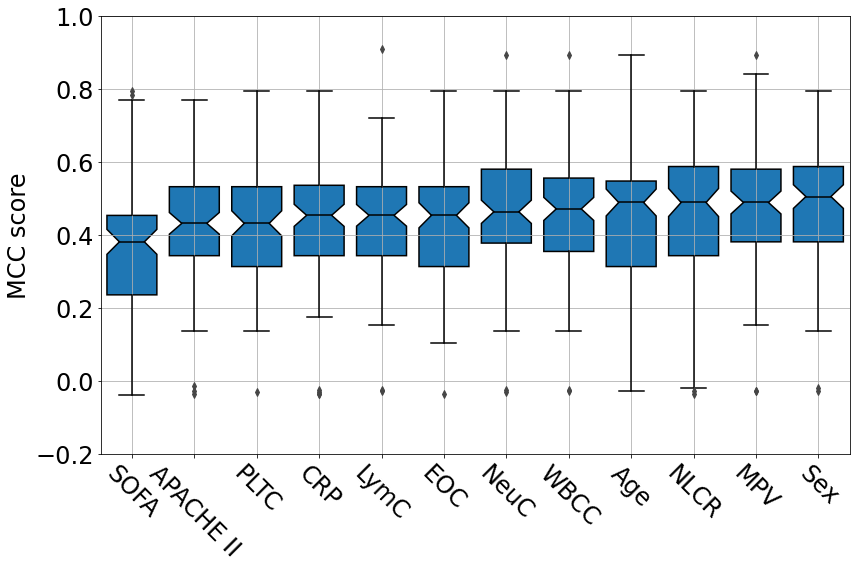

In [6]:
import matplotlib as mpl
label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
ITER_RESULTS_SIRS_RFE_XGB=load('ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_XGB')
MCC_RFE_SIRS_XGB=pd.DataFrame([[i[j].MCC[0] for j in range(len(i))] for i in ITER_RESULTS_SIRS_RFE_XGB])
MCC_RFE_SIRS_XGB=MCC_RFE_SIRS_XGB.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SIRS_XGB=MCC_RFE_SIRS_XGB.rename(columns={'sex2':'Sex'})

# Plot MCC Scores
plt.figure(figsize=(12,8))
ax=sns.boxplot(data=MCC_RFE_SIRS_XGB[MCC_RFE_SIRS_XGB.median().sort_values().index], notch=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='tab:blue')
plt.setp(ax.lines, color='k')
ax.set_xticklabels(MCC_RFE_SIRS_XGB.median().sort_values().index)
ax.set_ylabel('MCC score',fontsize=label_size)
ax.set_ylim([-0.2,1])
plt.xticks(rotation=-45)
#plt.title('MCC after removing a specific variable - XGB',fontsize=label_size)
plt.tight_layout()
plt.grid()

plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_XGB.png',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_XGB.svg',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_XGB.pdf',dpi=300)
plt.savefig('ReRun_ALL/Boxplot_MCC_RFE_SVC_SIRS_smote_XGB.eps',dpi=300)

plt.show()

In [32]:
# Load Results
RESULTS_SIRS_ALL=load('ReRun_ALL/RESULTS_SIRS_ALL_smote')
RESULTS_SEPSIS_ALL=load('ReRun_ALL/RESULTS_SEPSIS_ALL_smote')

# List of Algorithms
clfs=RESULTS_SIRS_ALL[0].Classifier
clfs
clfs_dict={i:clfs[i] for i in range(len(clfs))}
print(clfs_dict)


# Store MCC scores in array/dataframe
mcc_scores_arr_sirs=np.array([i.MCC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_arr_sepsis=np.array([i.MCC.to_list() for i in RESULTS_SEPSIS_ALL])

mcc_scores_df=pd.DataFrame([i.MCC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_df_SIRS=mcc_scores_df.rename(columns=clfs_dict)
mcc_scores_df=pd.DataFrame([i.MCC.to_list() for i in RESULTS_SEPSIS_ALL])
mcc_scores_df_SEPSIS=mcc_scores_df.rename(columns=clfs_dict)


mcc_scores_df_SEPSIS
mcc_scores_df_SIRS

med_sepsi=mcc_scores_df_SEPSIS.median()
qrt1_sepsi=mcc_scores_df_SEPSIS.quantile(0.25)
qrt3_sepsi=mcc_scores_df_SEPSIS.quantile(0.75)

med_sirs=mcc_scores_df_SIRS.median()
qrt1_sirs=mcc_scores_df_SIRS.quantile(0.25)
qrt3_sirs=mcc_scores_df_SIRS.quantile(0.75)


str_Sepsis=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(med_sepsi,qrt1_sepsi,qrt3_sepsi)]
str_Sirs=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(med_sirs,qrt1_sirs,qrt3_sirs)]

MccResults=pd.DataFrame([str_Sepsis,str_Sirs],columns=mcc_scores_df_SEPSIS.columns,index=['Sepsis','Sirs'])
display(MccResults.T)
#MccResults.T.to_latex('ReRun_ALL/Results_MCC_Models.tex')


descr_sirs_mcc_lr=MCC_RFE_SIRS_LR.describe().iloc[[5,4,6],:]
descr_sirs_mcc_xgb=MCC_RFE_SIRS_XGB.describe().iloc[[5,4,6],:]

descr_sepsis_mcc_xgb=MCC_RFE_SEPSIS_XGB.describe().iloc[[5,4,6],:]
descr_sepsis_mcc_lr=MCC_RFE_SEPSIS_LR.describe().iloc[[5,4,6],:]

str_descr_Sirs_lr=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sirs_mcc_lr.iloc[0,:],descr_sirs_mcc_lr.iloc[1,:],descr_sirs_mcc_lr.iloc[2,:])]
str_descr_Sirs_xgb=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sirs_mcc_xgb.iloc[0,:],descr_sirs_mcc_xgb.iloc[1,:],descr_sirs_mcc_xgb.iloc[2,:])]

str_descr_Sepsis_lr=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sepsis_mcc_lr.iloc[0,:],descr_sepsis_mcc_lr.iloc[1,:],descr_sepsis_mcc_lr.iloc[2,:])]
str_descr_Sepsis_xgb=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sepsis_mcc_xgb.iloc[0,:],descr_sepsis_mcc_xgb.iloc[1,:],descr_sepsis_mcc_xgb.iloc[2,:])]
str_descr_Sepsis_xgb

Mcc_Descr_Results=pd.DataFrame([str_descr_Sepsis_lr,str_descr_Sepsis_xgb,str_descr_Sirs_lr,str_descr_Sirs_xgb],columns=MCC_RFE_SIRS_LR.columns,index=['Sepsis_LR','Sepsis_XGB','Sirs_LR','Sirs_XGB'])
display(Mcc_Descr_Results.T)
#Mcc_Descr_Results.T.to_latex('ReRun_ALL/Results_Models_FeatImp_Descr.tex')


{0: 'SVC_lin', 1: 'LR', 2: 'TREE', 3: 'RF', 4: 'XGB'}


,Sepsis,Sirs
SVC_lin,0.533(0.456-0.574),0.378(0.31-0.436)
LR,0.533(0.456-0.591),0.379(0.313-0.451)
TREE,0.368(0.312-0.446),0.289(0.202-0.378)
RF,0.516(0.431-0.573),0.39(0.3-0.505)
XGB,0.459(0.397-0.534),0.489(0.343-0.582)


,Sepsis_LR,Sepsis_XGB,Sirs_LR,Sirs_XGB
Age,0.533(0.475-0.58),0.476(0.432-0.534),0.379(0.326-0.439),0.489(0.313-0.548)
Sex,0.537(0.466-0.595),0.476(0.416-0.539),0.379(0.313-0.436),0.505(0.381-0.587)
SOFA,0.535(0.469-0.592),0.437(0.37-0.515),0.378(0.3-0.436),0.381(0.236-0.453)
APACHE II,0.436(0.383-0.496),0.394(0.333-0.456),0.313(0.25-0.379),0.432(0.343-0.532)
CRP,0.528(0.462-0.591),0.495(0.4-0.553),0.405(0.356-0.463),0.454(0.343-0.536)
WBCC,0.533(0.467-0.591),0.489(0.427-0.533),0.379(0.323-0.442),0.471(0.355-0.556)
NeuC,0.533(0.456-0.591),0.477(0.401-0.539),0.391(0.325-0.451),0.463(0.378-0.58)
LymC,0.533(0.471-0.591),0.489(0.416-0.534),0.391(0.313-0.45),0.454(0.343-0.532)
EOC,0.526(0.476-0.591),0.469(0.395-0.537),0.391(0.313-0.439),0.454(0.313-0.532)
NLCR,0.529(0.462-0.591),0.479(0.416-0.535),0.402(0.323-0.463),0.489(0.343-0.587)


In [33]:
# Load Results
RESULTS_SIRS_ALL=load('ReRun_ALL/RESULTS_SIRS_ALL_smote')
RESULTS_SEPSIS_ALL=load('ReRun_ALL/RESULTS_SEPSIS_ALL_smote')

# List of Algorithms
clfs=RESULTS_SIRS_ALL[0].Classifier
clfs
clfs_dict={i:clfs[i] for i in range(len(clfs))}
print(clfs_dict)


# Store MCC scores in array/dataframe
mcc_scores_arr_sirs=np.array([i.AUPRC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_arr_sepsis=np.array([i.AUPRC.to_list() for i in RESULTS_SEPSIS_ALL])

mcc_scores_df=pd.DataFrame([i.AUPRC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_df_SIRS=mcc_scores_df.rename(columns=clfs_dict)
mcc_scores_df=pd.DataFrame([i.AUPRC.to_list() for i in RESULTS_SEPSIS_ALL])
mcc_scores_df_SEPSIS=mcc_scores_df.rename(columns=clfs_dict)


mcc_scores_df_SEPSIS
mcc_scores_df_SIRS

med_sepsi=mcc_scores_df_SEPSIS.median()
qrt1_sepsi=mcc_scores_df_SEPSIS.quantile(0.25)
qrt3_sepsi=mcc_scores_df_SEPSIS.quantile(0.75)

med_sirs=mcc_scores_df_SIRS.median()
qrt1_sirs=mcc_scores_df_SIRS.quantile(0.25)
qrt3_sirs=mcc_scores_df_SIRS.quantile(0.75)


str_Sepsis=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(med_sepsi,qrt1_sepsi,qrt3_sepsi)]
str_Sirs=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(med_sirs,qrt1_sirs,qrt3_sirs)]

MccResults=pd.DataFrame([str_Sepsis,str_Sirs],columns=mcc_scores_df_SEPSIS.columns,index=['Sepsis','Sirs'])
display(MccResults.T)
#MccResults.T.to_latex('ReRun_ALL/Results_AUPRC_Models.tex')

lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
ITER_RESULTS_SIRS_RFE_XGB=load('ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_XGB')
ITER_RESULTS_SIRS_RFE_LR=load('ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_LR')
ITER_RESULTS_SEPSIS_RFE_LR=load('ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_LR')
ITER_RESULTS_SEPSIS_RFE_XGB=load('ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_XGB')

MCC_RFE_SIRS_LR=pd.DataFrame([[i[j].AUPRC[0] for j in range(len(i))] for i in ITER_RESULTS_SIRS_RFE_LR])
MCC_RFE_SIRS_LR=MCC_RFE_SIRS_LR.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SIRS_LR=MCC_RFE_SIRS_LR.rename(columns={'sex2':'Sex'})
MCC_RFE_SIRS_XGB=pd.DataFrame([[i[j].AUPRC[0] for j in range(len(i))] for i in ITER_RESULTS_SIRS_RFE_XGB])
MCC_RFE_SIRS_XGB=MCC_RFE_SIRS_XGB.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SIRS_XGB=MCC_RFE_SIRS_XGB.rename(columns={'sex2':'Sex'})
MCC_RFE_SEPSIS_LR=pd.DataFrame([[i[j].AUPRC[0] for j in range(len(i))] for i in ITER_RESULTS_SEPSIS_RFE_LR])
MCC_RFE_SEPSIS_LR=MCC_RFE_SEPSIS_LR.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SEPSIS_LR=MCC_RFE_SEPSIS_LR.rename(columns={'sex2':'Sex'})
MCC_RFE_SEPSIS_XGB=pd.DataFrame([[i[j].AUPRC[0] for j in range(len(i))] for i in ITER_RESULTS_SEPSIS_RFE_XGB])
MCC_RFE_SEPSIS_XGB=MCC_RFE_SEPSIS_XGB.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SEPSIS_XGB=MCC_RFE_SEPSIS_XGB.rename(columns={'sex2':'Sex'})


descr_sirs_mcc_lr=MCC_RFE_SIRS_LR.describe().iloc[[5,4,6],:]
descr_sirs_mcc_xgb=MCC_RFE_SIRS_XGB.describe().iloc[[5,4,6],:]

descr_sepsis_mcc_xgb=MCC_RFE_SEPSIS_XGB.describe().iloc[[5,4,6],:]
descr_sepsis_mcc_lr=MCC_RFE_SEPSIS_LR.describe().iloc[[5,4,6],:]

str_descr_Sirs_lr=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sirs_mcc_lr.iloc[0,:],descr_sirs_mcc_lr.iloc[1,:],descr_sirs_mcc_lr.iloc[2,:])]
str_descr_Sirs_xgb=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sirs_mcc_xgb.iloc[0,:],descr_sirs_mcc_xgb.iloc[1,:],descr_sirs_mcc_xgb.iloc[2,:])]

str_descr_Sepsis_lr=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sepsis_mcc_lr.iloc[0,:],descr_sepsis_mcc_lr.iloc[1,:],descr_sepsis_mcc_lr.iloc[2,:])]
str_descr_Sepsis_xgb=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sepsis_mcc_xgb.iloc[0,:],descr_sepsis_mcc_xgb.iloc[1,:],descr_sepsis_mcc_xgb.iloc[2,:])]
str_descr_Sepsis_xgb

Mcc_Descr_Results=pd.DataFrame([str_descr_Sepsis_lr,str_descr_Sepsis_xgb,str_descr_Sirs_lr,str_descr_Sirs_xgb],columns=MCC_RFE_SIRS_LR.columns,index=['Sepsis_LR','Sepsis_XGB','Sirs_LR','Sirs_XGB'])
display(Mcc_Descr_Results.T)
#Mcc_Descr_Results.T.to_latex('ReRun_ALL/Results_Models_FeatImp_Descr_AUPRC.tex')


{0: 'SVC_lin', 1: 'LR', 2: 'TREE', 3: 'RF', 4: 'XGB'}


,Sepsis,Sirs
SVC_lin,0.956(0.939-0.965),0.996(0.99-0.999)
LR,0.954(0.939-0.964),0.995(0.99-0.999)
TREE,0.907(0.898-0.92),0.99(0.987-0.993)
RF,0.95(0.936-0.962),0.998(0.994-0.999)
XGB,0.94(0.928-0.952),0.998(0.992-0.999)


,Sepsis_LR,Sepsis_XGB,Sirs_LR,Sirs_XGB
Age,0.955(0.94-0.964),0.943(0.93-0.956),0.996(0.99-0.999),0.998(0.993-0.999)
Sex,0.956(0.938-0.965),0.94(0.928-0.954),0.996(0.994-0.999),0.998(0.993-0.999)
SOFA,0.941(0.923-0.958),0.923(0.907-0.94),0.996(0.99-0.999),0.997(0.993-0.999)
APACHE II,0.933(0.915-0.949),0.911(0.891-0.928),0.992(0.985-0.998),0.996(0.99-0.998)
CRP,0.956(0.94-0.965),0.94(0.931-0.954),0.996(0.99-0.999),0.998(0.993-0.999)
WBCC,0.954(0.939-0.963),0.942(0.927-0.952),0.996(0.99-0.999),0.997(0.992-0.999)
NeuC,0.954(0.939-0.964),0.94(0.925-0.951),0.995(0.99-0.999),0.997(0.992-0.999)
LymC,0.955(0.937-0.964),0.941(0.929-0.953),0.995(0.99-0.999),0.997(0.993-0.999)
EOC,0.954(0.941-0.965),0.943(0.933-0.953),0.996(0.989-0.999),0.995(0.99-0.999)
NLCR,0.955(0.941-0.964),0.941(0.93-0.955),0.995(0.99-0.999),0.997(0.992-0.999)


In [34]:
# Load Results
RESULTS_SIRS_ALL=load('ReRun_ALL/RESULTS_SIRS_ALL_smote')
RESULTS_SEPSIS_ALL=load('ReRun_ALL/RESULTS_SEPSIS_ALL_smote')

# List of Algorithms
clfs=RESULTS_SIRS_ALL[0].Classifier
clfs
clfs_dict={i:clfs[i] for i in range(len(clfs))}
print(clfs_dict)


# Store MCC scores in array/dataframe
mcc_scores_arr_sirs=np.array([i.AUROC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_arr_sepsis=np.array([i.AUROC.to_list() for i in RESULTS_SEPSIS_ALL])

mcc_scores_df=pd.DataFrame([i.AUROC.to_list() for i in RESULTS_SIRS_ALL])
mcc_scores_df_SIRS=mcc_scores_df.rename(columns=clfs_dict)
mcc_scores_df=pd.DataFrame([i.AUROC.to_list() for i in RESULTS_SEPSIS_ALL])
mcc_scores_df_SEPSIS=mcc_scores_df.rename(columns=clfs_dict)


mcc_scores_df_SEPSIS
mcc_scores_df_SIRS

med_sepsi=mcc_scores_df_SEPSIS.median()
qrt1_sepsi=mcc_scores_df_SEPSIS.quantile(0.25)
qrt3_sepsi=mcc_scores_df_SEPSIS.quantile(0.75)

med_sirs=mcc_scores_df_SIRS.median()
qrt1_sirs=mcc_scores_df_SIRS.quantile(0.25)
qrt3_sirs=mcc_scores_df_SIRS.quantile(0.75)


str_Sepsis=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(med_sepsi,qrt1_sepsi,qrt3_sepsi)]
str_Sirs=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(med_sirs,qrt1_sirs,qrt3_sirs)]

MccResults=pd.DataFrame([str_Sepsis,str_Sirs],columns=mcc_scores_df_SEPSIS.columns,index=['Sepsis','Sirs'])
display(MccResults.T)
#MccResults.T.to_latex('ReRun_ALL/Results_AUPRC_Models.tex')

lst=['Age', 'sex2','SOFA','APACHE II', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV']
ITER_RESULTS_SIRS_RFE_XGB=load('ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_XGB')
ITER_RESULTS_SIRS_RFE_LR=load('ReRun_ALL/ITER_RESULTS_SIRS_RFE_smote_LR')
ITER_RESULTS_SEPSIS_RFE_LR=load('ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_LR')
ITER_RESULTS_SEPSIS_RFE_XGB=load('ReRun_ALL/ITER_RESULTS_SEPSIS_RFE_smote_XGB')

MCC_RFE_SIRS_LR=pd.DataFrame([[i[j].AUROC[0] for j in range(len(i))] for i in ITER_RESULTS_SIRS_RFE_LR])
MCC_RFE_SIRS_LR=MCC_RFE_SIRS_LR.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SIRS_LR=MCC_RFE_SIRS_LR.rename(columns={'sex2':'Sex'})
MCC_RFE_SIRS_XGB=pd.DataFrame([[i[j].AUROC[0] for j in range(len(i))] for i in ITER_RESULTS_SIRS_RFE_XGB])
MCC_RFE_SIRS_XGB=MCC_RFE_SIRS_XGB.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SIRS_XGB=MCC_RFE_SIRS_XGB.rename(columns={'sex2':'Sex'})
MCC_RFE_SEPSIS_LR=pd.DataFrame([[i[j].AUROC[0] for j in range(len(i))] for i in ITER_RESULTS_SEPSIS_RFE_LR])
MCC_RFE_SEPSIS_LR=MCC_RFE_SEPSIS_LR.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SEPSIS_LR=MCC_RFE_SEPSIS_LR.rename(columns={'sex2':'Sex'})
MCC_RFE_SEPSIS_XGB=pd.DataFrame([[i[j].AUROC[0] for j in range(len(i))] for i in ITER_RESULTS_SEPSIS_RFE_XGB])
MCC_RFE_SEPSIS_XGB=MCC_RFE_SEPSIS_XGB.rename(columns={i:lst[i] for i in range(len(lst))})
MCC_RFE_SEPSIS_XGB=MCC_RFE_SEPSIS_XGB.rename(columns={'sex2':'Sex'})


descr_sirs_mcc_lr=MCC_RFE_SIRS_LR.describe().iloc[[5,4,6],:]
descr_sirs_mcc_xgb=MCC_RFE_SIRS_XGB.describe().iloc[[5,4,6],:]

descr_sepsis_mcc_xgb=MCC_RFE_SEPSIS_XGB.describe().iloc[[5,4,6],:]
descr_sepsis_mcc_lr=MCC_RFE_SEPSIS_LR.describe().iloc[[5,4,6],:]

str_descr_Sirs_lr=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sirs_mcc_lr.iloc[0,:],descr_sirs_mcc_lr.iloc[1,:],descr_sirs_mcc_lr.iloc[2,:])]
str_descr_Sirs_xgb=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sirs_mcc_xgb.iloc[0,:],descr_sirs_mcc_xgb.iloc[1,:],descr_sirs_mcc_xgb.iloc[2,:])]

str_descr_Sepsis_lr=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sepsis_mcc_lr.iloc[0,:],descr_sepsis_mcc_lr.iloc[1,:],descr_sepsis_mcc_lr.iloc[2,:])]
str_descr_Sepsis_xgb=[str(round(i,3))+'('+str(round(j,3))+'-'+str(round(k,3))+')' for i,j,k in zip(
    descr_sepsis_mcc_xgb.iloc[0,:],descr_sepsis_mcc_xgb.iloc[1,:],descr_sepsis_mcc_xgb.iloc[2,:])]
str_descr_Sepsis_xgb

Mcc_Descr_Results=pd.DataFrame([str_descr_Sepsis_lr,str_descr_Sepsis_xgb,str_descr_Sirs_lr,str_descr_Sirs_xgb],columns=MCC_RFE_SIRS_LR.columns,index=['Sepsis_LR','Sepsis_XGB','Sirs_LR','Sirs_XGB'])
display(Mcc_Descr_Results.T)
#Mcc_Descr_Results.T.to_latex('ReRun_ALL/Results_Models_FeatImp_Descr_AUPRC.tex')


{0: 'SVC_lin', 1: 'LR', 2: 'TREE', 3: 'RF', 4: 'XGB'}


,Sepsis,Sirs
SVC_lin,0.87(0.836-0.895),0.904(0.82-0.966)
LR,0.865(0.836-0.888),0.882(0.821-0.969)
TREE,0.694(0.661-0.734),0.681(0.591-0.772)
RF,0.863(0.828-0.889),0.936(0.849-0.968)
XGB,0.83(0.804-0.863),0.93(0.846-0.97)


,Sepsis_LR,Sepsis_XGB,Sirs_LR,Sirs_XGB
Age,0.867(0.841-0.888),0.839(0.814-0.864),0.89(0.824-0.966),0.927(0.843-0.965)
Sex,0.869(0.842-0.891),0.833(0.807-0.867),0.897(0.86-0.965),0.928(0.848-0.97)
SOFA,0.843(0.815-0.877),0.807(0.777-0.841),0.897(0.822-0.961),0.925(0.842-0.966)
APACHE II,0.825(0.79-0.849),0.775(0.739-0.801),0.835(0.764-0.936),0.897(0.811-0.951)
CRP,0.87(0.843-0.89),0.835(0.812-0.867),0.889(0.821-0.972),0.934(0.848-0.969)
WBCC,0.865(0.835-0.889),0.831(0.811-0.863),0.883(0.82-0.966),0.924(0.834-0.97)
NeuC,0.867(0.836-0.891),0.833(0.808-0.861),0.883(0.82-0.968),0.923(0.836-0.968)
LymC,0.866(0.838-0.889),0.832(0.813-0.867),0.882(0.817-0.968),0.923(0.84-0.968)
EOC,0.865(0.839-0.887),0.837(0.817-0.863),0.887(0.82-0.967),0.873(0.809-0.956)
NLCR,0.869(0.836-0.887),0.835(0.809-0.874),0.888(0.824-0.968),0.928(0.834-0.971)


In [35]:
pvals_mann_surv=load('ReRun_ALL/pvals_mann_surv')
pvals_mann_seps=load('ReRun_ALL/pvals_mann_seps')
pvals_krusk=load('ReRun_ALL/pvals_krusk')
pvals_posthoc=load('ReRun_ALL/pvals_posthoc')
pvals_chi2=load('ReRun_ALL/pvals_chi2')

In [36]:
#1:g_sirs_no,2:g_sirs_si,3:g_sepsis_no,4:g_sepsis_si
pvals_posthoc

pvals_posthoc[0][1]
pvals_posthoc[1][0]

for i in range(0,len(pvals_posthoc)):
    print(i)
    if i==0:
        print(i)
        temp=pvals_posthoc[i][1].copy()
        temp['var']=pvals_posthoc[i][0]
        temp['indx']=['SIRS_SURVIVED','SIRS_DEAD','SEPSIS_SURVIVED','SEPSIS_DEAD']
        A=temp.copy()
    else:
        print('o')
        temp=pvals_posthoc[i][1].copy()
        temp['var']=pvals_posthoc[i][0]
        temp['indx']=['SIRS_SURVIVED','SIRS_DEAD','SEPSIS_SURVIVED','SEPSIS_DEAD']
        A=A.append(temp.copy())

        
A=A.rename(columns={1:'SIRS_SURVIVED',2:'SIRS_DEAD',3:'SEPSIS_SURVIVED',4:'SEPSIS_DEAD'})
Post_Hocs=A.set_index('var')
Post_Hocs

0
0
1
o
2
o
3
o
4
o
5
o
6
o
7
o
8
o
9
o


,SIRS_SURVIVED,SIRS_DEAD,SEPSIS_SURVIVED,SEPSIS_DEAD,indx
var,,,,,
Age,1.000000e+00,2.179075e-01,1.000000e+00,1.000000e+00,SIRS_SURVIVED
Age,2.179075e-01,1.000000e+00,3.272094e-07,7.480567e-10,SIRS_DEAD
Age,1.000000e+00,3.272094e-07,1.000000e+00,1.000000e+00,SEPSIS_SURVIVED
Age,1.000000e+00,7.480567e-10,1.000000e+00,1.000000e+00,SEPSIS_DEAD
APACHE II,1.000000e+00,1.694627e-14,1.000000e+00,8.832012e-03,SIRS_SURVIVED
APACHE II,1.694627e-14,1.000000e+00,1.077864e-60,6.248079e-47,SIRS_DEAD
APACHE II,1.000000e+00,1.077864e-60,1.000000e+00,2.102328e-11,SEPSIS_SURVIVED
APACHE II,8.832012e-03,6.248079e-47,2.102328e-11,1.000000e+00,SEPSIS_DEAD
SOFA,1.000000e+00,3.518591e-12,1.000000e+00,1.768205e-04,SIRS_SURVIVED


In [37]:
len(pvals_posthoc)

10

In [38]:
Results=pd.DataFrame(pvals_mann_surv,columns=['Var','pVal_MW_Survival']).set_index('Var')
Results['pVal_MW_Sepsis']=pd.DataFrame(pvals_mann_seps,columns=['Var','pVal_MW_Survival']).set_index('Var')
Results['pVal_KW_SepsisSurv']=pd.DataFrame(pvals_krusk,columns=['Var','pVal_KW_SepsisSurv']).set_index('Var')

Results

,pVal_MW_Survival,pVal_MW_Sepsis,pVal_KW_SepsisSurv
Var,,,
Age,8.289687e-06,9.184101e-14,2.583061e-13
APACHE II,1.467350e-52,2.567777e-74,5.903242e-96
SOFA,4.342427e-52,5.463426e-40,3.817952e-71
CRP,1.319380e-06,2.251609e-24,5.077432e-23
WBCC,5.310292e-01,2.462637e-03,6.219023e-03
NeuC,9.209730e-01,4.548543e-03,2.412804e-02
LymC,2.917334e-01,1.400213e-11,7.209077e-11
EOC,3.445598e-03,1.837307e-01,3.871361e-05
NLCR,2.748635e-01,8.194454e-05,1.176701e-03


In [39]:
Post_Hocs_V2=np.round(Post_Hocs,3)
Results_V2=np.round(Results,3)
Post_Hocs_V2

,SIRS_SURVIVED,SIRS_DEAD,SEPSIS_SURVIVED,SEPSIS_DEAD,indx
var,,,,,
Age,1.000,0.218,1.000,1.000,SIRS_SURVIVED
Age,0.218,1.000,0.000,0.000,SIRS_DEAD
Age,1.000,0.000,1.000,1.000,SEPSIS_SURVIVED
Age,1.000,0.000,1.000,1.000,SEPSIS_DEAD
APACHE II,1.000,0.000,1.000,0.009,SIRS_SURVIVED
APACHE II,0.000,1.000,0.000,0.000,SIRS_DEAD
APACHE II,1.000,0.000,1.000,0.000,SEPSIS_SURVIVED
APACHE II,0.009,0.000,0.000,1.000,SEPSIS_DEAD
SOFA,1.000,0.000,1.000,0.000,SIRS_SURVIVED


In [40]:
Results_V2.to_latex('ReRun_ALL\Biostat_Results_1.tex')
Post_Hocs_V2.to_latex('ReRun_ALL\Biostat_Results_2.tex')